<a href="https://colab.research.google.com/github/Joshua-Nti/Master_Thesis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Cell 1
# only necessary for google colab! to load models into session
!git clone https://github.com/Joshua-Nti/Master_Thesis
!mv Master_Thesis/* ./

fatal: destination path 'Master_Thesis' already exists and is not an empty directory.
mv: cannot stat 'Master_Thesis/*': No such file or directory


In [5]:
# Cell 2
!pip install tetgen
!pip install pyvista
!pip install scipy
!pip install open3d
!pip install pygcode
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [6]:
# # Cell 3
# import networkx as nx
# import numpy as np
# import pyvista as pv
# import tetgen
# from scipy.optimize import minimize, least_squares
# from scipy.spatial.transform import Rotation as R
# import open3d as o3d
# import time
# import pickle
# import base64
# pv.set_jupyter_backend('static') # Google colab only allows static rendering. Download and run notepad locally to view in 3D!
# pv.global_theme.notebook = True
# pv.start_xvfb()

# def encode_object(obj):
#     return base64.b64encode(pickle.dumps(obj)).decode('utf-8')

# def decode_object(encoded_str):
#     return pickle.loads(base64.b64decode(encoded_str))

# up_vector = np.array([0, 0, 1])

# # Load mesh
# # model_name = "pi 3mm"
# model_name = "Test_body"
# mesh = o3d.io.read_triangle_mesh(f'input_models/{model_name}.stl')

# # convert to tetrahedral mesh
# input_tet = tetgen.TetGen(np.asarray(mesh.vertices), np.asarray(mesh.triangles))
# # input_tet.make_manifold() # comment out if not needed
# input_tet.tetrahedralize()
# input_tet = input_tet.grid

# # rotate
# # input_tet = input_tet.rotate_x(-90) # b axis mount

# # scale
# # input_tet = input_tet.scale(1.5)

# # make origin center bottom of bounding box
# # PART_OFFSET = np.array([0., 10., 0.]) # z mount
# # PART_OFFSET = np.array([-13., -10., 0.]) # bunny
# # PART_OFFSET = np.array([60., 0., 0.]) # benchy
# # PART_OFFSET = np.array([0., 10., 0.]) # benchy upsidedown tilted
# # PART_OFFSET = np.array([0., 10., 0.]) # squirtle
# # PART_OFFSET = np.array([-44., 0., 0.]) # b axis mount
# # PART_OFFSET = np.array([50., 20., 0.]) # mew
# PART_OFFSET = np.array([0., 0., 0.])
# x_min, x_max, y_min, y_max, z_min, z_max = input_tet.bounds
# input_tet.points -= np.array([(x_min + x_max) / 2, (y_min + y_max) / 2, z_min]) + PART_OFFSET


# # find neighbours
# cell_neighbour_dict = {neighbour_type: {face: [] for face in range(input_tet.number_of_cells)} for neighbour_type in ["point", "edge", "face"]}
# for neighbour_type in ["point", "edge", "face"]:
#     cell_neighbours = []
#     for cell_index in range(input_tet.number_of_cells):
#         neighbours = input_tet.cell_neighbors(cell_index, f"{neighbour_type}s")
#         for neighbour in neighbours:
#             if neighbour > cell_index:
#                 cell_neighbours.append((cell_index, neighbour))
#     for face_1, face_2 in np.array(cell_neighbours):
#         cell_neighbour_dict[neighbour_type][face_1].append(face_2)
#         cell_neighbour_dict[neighbour_type][face_2].append(face_1)

#     input_tet.field_data[f"cell_{neighbour_type}_neighbours"] = np.array(cell_neighbours)

# cell_neighbour_graph = nx.Graph()
# cell_centers = input_tet.cell_centers().points
# for edge in input_tet.field_data["cell_point_neighbours"]: # use point neighbours for best accuracy
#     distance = np.linalg.norm(cell_centers[edge[0]] - cell_centers[edge[1]])
#     cell_neighbour_graph.add_weighted_edges_from([(edge[0], edge[1], distance)])

# def update_tet_attributes(tet):
#     '''
#     Calculate face normals, face centers, cell centers, and overhang angles for each cell in the tetrahedral mesh.
#     '''

#     surface_mesh = tet.extract_surface()
#     cell_to_face = decode_object(tet.field_data["cell_to_face"])

#     # put general data in field_data for easy access
#     cells = tet.cells.reshape(-1, 5)[:, 1:] # assume all cells have 4 vertices
#     tet.add_field_data(cells, "cells")
#     cell_vertices = tet.points
#     tet.add_field_data(cell_vertices, "cell_vertices")
#     faces = surface_mesh.faces.reshape(-1, 4)[:, 1:] # assume all faces have 3 vertices
#     tet.add_field_data(faces, "faces")
#     face_vertices = surface_mesh.points
#     tet.add_field_data(face_vertices, "face_vertices")

#     tet.cell_data['face_normal'] = np.full((tet.number_of_cells, 3), np.nan)
#     surface_mesh_face_normals = surface_mesh.face_normals
#     for cell_index, face_indices in cell_to_face.items():
#         face_normals = surface_mesh_face_normals[face_indices]
#         # get the normal facing the most down
#         most_down_normal_index = np.argmin(face_normals[:, 2])
#         tet.cell_data['face_normal'][cell_index] = face_normals[most_down_normal_index]
#     tet.cell_data['face_normal'] =  tet.cell_data['face_normal'] / np.linalg.norm(tet.cell_data['face_normal'], axis=1)[:, None]

#     tet.cell_data['face_center'] = np.empty((tet.number_of_cells, 3))
#     tet.cell_data['face_center'][:,:] = np.nan
#     surface_mesh_cell_centers = surface_mesh.cell_centers().points
#     for cell_index, face_indices in cell_to_face.items():
#         face_centers = surface_mesh_cell_centers[face_indices]
#         # get the normal facing the most down
#         most_down_center_index = np.argmin(face_centers[:, 2])
#         tet.cell_data['face_center'][cell_index] = face_centers[most_down_center_index]

#     tet.cell_data["cell_center"] = tet.cell_centers().points

#     # calculate bottom cells
#     bottom_cell_threshold = np.nanmin(tet.cell_data['face_center'][:, 2])+0.3
#     bottom_cells_mask = tet.cell_data['face_center'][:, 2] < bottom_cell_threshold
#     tet.cell_data['is_bottom'] = bottom_cells_mask
#     bottom_cells = np.where(bottom_cells_mask)[0]

#     face_normals = tet.cell_data['face_normal'].copy()
#     face_normals[bottom_cells_mask] = np.nan # make bottom faces not angled
#     overhang_angle = np.arccos(np.dot(face_normals, up_vector))
#     tet.cell_data['overhang_angle'] = overhang_angle

#     overhang_direction = face_normals[:, :2].copy()
#     overhang_direction /= np.linalg.norm(overhang_direction, axis=1)[:, None]
#     tet.cell_data['overhang_direction'] = overhang_direction

#     # calculate if cell will print in air by seeing if any cell centers along path to base are higher
#     IN_AIR_THRESHOLD = 1
#     tet.cell_data['in_air'] = np.full(tet.number_of_cells, False)

#     _, paths_to_bottom = nx.multi_source_dijkstra(cell_neighbour_graph, set(bottom_cells))

#     # put it in cell data
#     tet.cell_data['path_to_bottom'] = np.full((tet.number_of_cells, np.max([len(x) for x in paths_to_bottom.values()])), -1)
#     for cell_index, path_to_bottom in paths_to_bottom.items():
#         tet.cell_data['path_to_bottom'][cell_index, :len(path_to_bottom)] = path_to_bottom

#     # calculate if cell is in air
#     for cell_index in range(tet.number_of_cells):
#         path_to_bottom = paths_to_bottom[cell_index]
#         if len(path_to_bottom) > 1:
#             cell_heights = tet.cell_data['cell_center'][path_to_bottom, 2]
#             if np.any(cell_heights > tet.cell_data['cell_center'][cell_index, 2] + IN_AIR_THRESHOLD):
#                 tet.cell_data['in_air'][cell_index] = True

#     return tet

# def calculate_tet_attributes(tet):
#     '''
#     Calculate shared vertices between cells, cell to face & face to cell relations, and bottom cells of the tetrahedral mesh.
#     '''

#     surface_mesh = tet.extract_surface()

#     # put general data in field_data for easy access
#     cells = tet.cells.reshape(-1, 5)[:, 1:] # assume all cells have 4 vertices
#     tet.add_field_data(cells, "cells")
#     cell_vertices = tet.points
#     tet.add_field_data(cell_vertices, "cell_vertices")
#     faces = surface_mesh.faces.reshape(-1, 4)[:, 1:] # assume all faces have 3 vertices
#     tet.add_field_data(faces, "faces")
#     face_vertices = surface_mesh.points
#     tet.add_field_data(face_vertices, "face_vertices")

#     # calculate shared vertices
#     shared_vertices = []
#     for cell_1, cell_2 in tet.field_data["cell_point_neighbours"]:
#         shared_vertices_these_faces = np.intersect1d(cells[cell_1], cells[cell_2])
#         for vertex in shared_vertices_these_faces:
#             shared_vertices.append({
#                     "cell_1_index": cell_1,
#                     "cell_2_index": cell_2,
#                     "cell_1_vertex_index": np.where(cells[cell_1] == vertex)[0][0],
#                     "cell_2_vertex_index": np.where(cells[cell_2] == vertex)[0][0],
#                 })

#     # calculate cell to face & face to cell relations
#     cell_to_face = {}
#     face_to_cell = {face_index: [] for face_index in range(len(faces))}
#     cell_to_face_vertices = {}
#     face_to_cell_vertices = {}
#     for cell_vertex_index, cell_vertex in enumerate(tet.field_data["cell_vertices"].reshape(-1, 3)):
#         face_vertex_index = np.where((face_vertices == cell_vertex).all(axis=1))[0]
#         if len(face_vertex_index) == 1:
#             cell_to_face_vertices[cell_vertex_index] = face_vertex_index[0]
#             face_to_cell_vertices[face_vertex_index[0]] = cell_vertex_index

#     for cell_index, cell in enumerate(tet.field_data["cells"]):
#         face_vertex_indices = [cell_to_face_vertices[cell_vertex_index] for cell_vertex_index in cell if cell_vertex_index in cell_to_face_vertices]
#         if len(face_vertex_indices) >= 3:
#             extracted = surface_mesh.extract_points(face_vertex_indices, adjacent_cells=False)
#             if extracted.number_of_cells >= 1:
#                 cell_to_face[cell_index] = list(extracted.cell_data['vtkOriginalCellIds'])
#                 for face_index in extracted.cell_data['vtkOriginalCellIds']:
#                     face_to_cell[face_index].append(cell_index)

#     tet.add_field_data(encode_object(cell_to_face), "cell_to_face")
#     tet.add_field_data(encode_object(face_to_cell), "face_to_cell")

#     # calculate has_face attribute
#     tet.cell_data['has_face'] = np.zeros(tet.number_of_cells)
#     for cell_index, face_indices in cell_to_face.items():
#         tet.cell_data['has_face'][cell_index] = 1

#     tet = update_tet_attributes(tet)

#     # calculate bottom cells
#     bottom_cells_mask = tet.cell_data['is_bottom']
#     bottom_cells = np.where(bottom_cells_mask)[0]

#     tet.cell_data['overhang_angle'][bottom_cells] = np.nan

#     return tet, bottom_cells_mask, bottom_cells


# bottom_cells_mask = None
# bottom_cells = None
# input_tet, bottom_cells_mask, bottom_cells = calculate_tet_attributes(input_tet)

# # find bottom cell groups that are connected
# bottom_cell_graph = nx.Graph()
# for cell_index in bottom_cells:
#     bottom_cell_graph.add_node(cell_index)
# cell_point_neighbour_dict = cell_neighbour_dict["point"]
# for cell_index in bottom_cells:
#     for neighbour in cell_point_neighbour_dict[cell_index]:
#         if neighbour in bottom_cells:
#             bottom_cell_graph.add_edge(cell_index, neighbour)

# bottom_cell_groups = [list(x) for x in list(nx.connected_components(bottom_cell_graph))]

# undeformed_tet = input_tet.copy()

In [7]:
# =========================
# Cell 3 — SELF-CONTAINED
# Robust loader + repair + tetgen + attributes
# =========================
import networkx as nx
import numpy as np
import pyvista as pv
import tetgen
from scipy.optimize import minimize, least_squares
from scipy.spatial.transform import Rotation as R
import open3d as o3d
import time, pickle, base64

pv.set_jupyter_backend('static')  # static in Colab
pv.global_theme.notebook = True
pv.start_xvfb()

def encode_object(obj):
    return base64.b64encode(pickle.dumps(obj)).decode('utf-8')

def decode_object(encoded_str):
    return pickle.loads(base64.b64decode(encoded_str))

def _decode_dict_field(tet, key):
    """Safely decode a dict stored as a single string in field_data."""
    arr = tet.field_data[key]
    # pyvista stores string arrays as 1D numpy arrays of dtype <U/... or object
    if isinstance(arr, np.ndarray):
        s = arr.ravel()[0]
    else:
        s = arr
    return decode_object(s)

up_vector = np.array([0, 0, 1])

# ----------------------------
# 1) Load & CLEAN the STL
# ----------------------------
model_name = "Test_body"  # expects input_models/test_body.stl
mesh_o3d = o3d.io.read_triangle_mesh(f'input_models/{model_name}.stl')
assert mesh_o3d.has_triangles(), "Loaded mesh has no triangles—check the STL path/name."

# Open3D cleaning
mesh_o3d.remove_duplicated_vertices()
mesh_o3d.remove_degenerate_triangles()
mesh_o3d.remove_duplicated_triangles()
mesh_o3d.remove_unreferenced_vertices()
mesh_o3d.remove_non_manifold_edges()
mesh_o3d.compute_triangle_normals()
try:
    mesh_o3d.orient_triangles()
except Exception:
    pass

is_edge_manifold = mesh_o3d.is_edge_manifold()
is_vertex_manifold = mesh_o3d.is_vertex_manifold()
is_self_intersecting = mesh_o3d.is_self_intersecting()
is_watertight = mesh_o3d.is_watertight()

# Convert to PyVista surface and optionally fill tiny holes if needed
if (not is_watertight) or (not is_edge_manifold) or is_self_intersecting:
    # Build a PyVista surface from o3d data
    V = np.asarray(mesh_o3d.vertices)
    F = np.asarray(mesh_o3d.triangles)
    surf_pv = pv.PolyData(V, np.hstack([np.full((len(F), 1), 3), F]).ravel())
    surf_pv = surf_pv.clean(tolerance=1e-9).triangulate().fill_holes(1.0).clean()
    V = surf_pv.points
    F = surf_pv.faces.reshape(-1, 4)[:, 1:]
else:
    V = np.asarray(mesh_o3d.vertices)
    F = np.asarray(mesh_o3d.triangles)

# Normalize extreme scales for TetGen stability
bbox = np.array([V.min(axis=0), V.max(axis=0)])
diag = np.linalg.norm(bbox[1] - bbox[0])
if diag > 1e5:
    V = V / 1000.0
elif diag < 1e-3:
    V = V * 1000.0

# ----------------------------
# 2) Tetrahedralize (TetGen)
# ----------------------------
tg = tetgen.TetGen(V, F)
try:
    tg.make_manifold()  # if available, heals more issues
except Exception:
    pass

# quality=True with mild constraints; relax if still problematic
tg.tetrahedralize(quality=True, mindihedral=10)
input_tet = tg.grid  # PyVista UnstructuredGrid

# ----------------------------
# 3) Recenter on build plate bottom
# ----------------------------
PART_OFFSET = np.array([0., 0., 0.])
x_min, x_max, y_min, y_max, z_min, z_max = input_tet.bounds
input_tet.points -= np.array([(x_min + x_max)/2, (y_min + y_max)/2, z_min]) + PART_OFFSET

# ----------------------------
# 4) Build neighbour lists & graph
# ----------------------------
cell_neighbour_dict = {nt: {face: [] for face in range(input_tet.number_of_cells)}
                       for nt in ["point", "edge", "face"]}
for neighbour_type in ["point", "edge", "face"]:
    cell_neighbours = []
    for cell_index in range(input_tet.number_of_cells):
        neighbours = input_tet.cell_neighbors(cell_index, f"{neighbour_type}s")
        for neighbour in neighbours:
            if neighbour > cell_index:
                cell_neighbours.append((cell_index, neighbour))
    for a, b in np.array(cell_neighbours):
        cell_neighbour_dict[neighbour_type][a].append(b)
        cell_neighbour_dict[neighbour_type][b].append(a)
    # store in field data for later use (as in your original code)
    input_tet.field_data[f"cell_{neighbour_type}_neighbours"] = np.array(cell_neighbours)

cell_neighbour_graph = nx.Graph()
cell_centers = input_tet.cell_centers().points
for edge in input_tet.field_data["cell_point_neighbours"]:
    distance = np.linalg.norm(cell_centers[edge[0]] - cell_centers[edge[1]])
    cell_neighbour_graph.add_weighted_edges_from([(edge[0], edge[1], distance)])

# ----------------------------
# 5) Attribute functions (from your original logic)
# ----------------------------
def update_tet_attributes(tet):
    """
    Uses cell_to_face (already computed) to calculate:
    - face normals (down-facing),
    - face centers (down-facing),
    - cell centers,
    - bottom cells mask,
    - overhang angles and directions,
    - 'in_air' test via shortest path to bottom using cell_neighbour_graph.
    """
    surface_mesh = tet.extract_surface()
    cell_to_face = _decode_dict_field(tet, "cell_to_face")

    # general data
    cells = tet.cells.reshape(-1, 5)[:, 1:]  # 4 verts per tet
    tet.add_field_data(cells, "cells")
    tet.add_field_data(tet.points, "cell_vertices")
    faces = surface_mesh.faces.reshape(-1, 4)[:, 1:]
    tet.add_field_data(faces, "faces")
    tet.add_field_data(surface_mesh.points, "face_vertices")

    # down-facing normals per cell
    tet.cell_data['face_normal'] = np.full((tet.number_of_cells, 3), np.nan)
    surf_normals = surface_mesh.face_normals
    for cell_index, face_indices in cell_to_face.items():
        face_normals = surf_normals[face_indices]
        most_down_idx = np.argmin(face_normals[:, 2])
        tet.cell_data['face_normal'][cell_index] = face_normals[most_down_idx]
    tet.cell_data['face_normal'] = tet.cell_data['face_normal'] / np.linalg.norm(
        tet.cell_data['face_normal'], axis=1)[:, None]

    # down-facing face centers per cell
    tet.cell_data['face_center'] = np.full((tet.number_of_cells, 3), np.nan)
    surf_centers = surface_mesh.cell_centers().points
    for cell_index, face_indices in cell_to_face.items():
        face_centers = surf_centers[face_indices]
        most_down_center_index = np.argmin(face_centers[:, 2])
        tet.cell_data['face_center'][cell_index] = face_centers[most_down_center_index]

    tet.cell_data["cell_center"] = tet.cell_centers().points

    # bottom cells (near-minimum face_center z)
    bottom_cell_threshold = np.nanmin(tet.cell_data['face_center'][:, 2]) + 0.3
    bottom_mask = tet.cell_data['face_center'][:, 2] < bottom_cell_threshold
    tet.cell_data['is_bottom'] = bottom_mask
    bottom_cells = np.where(bottom_mask)[0]

    # overhang angles (ignore bottoms)
    face_normals = tet.cell_data['face_normal'].copy()
    face_normals[bottom_mask] = np.nan
    overhang_angle = np.arccos(np.dot(face_normals, up_vector))
    tet.cell_data['overhang_angle'] = overhang_angle

    # overhang direction (XY unit)
    overhang_direction = face_normals[:, :2].copy()
    norms = np.linalg.norm(overhang_direction, axis=1)
    overhang_direction[norms > 0] /= norms[norms > 0][:, None]
    tet.cell_data['overhang_direction'] = overhang_direction

    # is cell "in air" along path to base?
    IN_AIR_THRESHOLD = 1.0
    tet.cell_data['in_air'] = np.full(tet.number_of_cells, False)

    _, paths_to_bottom = nx.multi_source_dijkstra(
        cell_neighbour_graph, set(bottom_cells)
    )

    # store path indices (ragged -> padded with -1)
    maxlen = max(len(x) for x in paths_to_bottom.values())
    arr = np.full((tet.number_of_cells, maxlen), -1)
    for ci, path in paths_to_bottom.items():
        arr[ci, :len(path)] = path
    tet.cell_data['path_to_bottom'] = arr

    for ci in range(tet.number_of_cells):
        path = paths_to_bottom[ci]
        if len(path) > 1:
            heights = tet.cell_data['cell_center'][path, 2]
            if np.any(heights > tet.cell_data['cell_center'][ci, 2] + IN_AIR_THRESHOLD):
                tet.cell_data['in_air'][ci] = True

    return tet

def calculate_tet_attributes(tet):
    """
    Computes connectivity mappings (cell_to_face / face_to_cell),
    stores them in field_data (encoded), and then calls update_tet_attributes.
    """
    surface_mesh = tet.extract_surface()

    # General data
    cells = tet.cells.reshape(-1, 5)[:, 1:]
    tet.add_field_data(cells, "cells")
    tet.add_field_data(tet.points, "cell_vertices")
    faces = surface_mesh.faces.reshape(-1, 4)[:, 1:]
    tet.add_field_data(faces, "faces")
    tet.add_field_data(surface_mesh.points, "face_vertices")

    # Shared vertices from point neighbours
    shared_vertices = []
    for cell_1, cell_2 in tet.field_data["cell_point_neighbours"]:
        shared = np.intersect1d(cells[cell_1], cells[cell_2])
        for v in shared:
            shared_vertices.append({
                "cell_1_index": cell_1,
                "cell_2_index": cell_2,
                "cell_1_vertex_index": np.where(cells[cell_1] == v)[0][0],
                "cell_2_vertex_index": np.where(cells[cell_2] == v)[0][0],
            })

    # Map cell <-> surface faces
    cell_to_face = {}
    face_to_cell = {fi: [] for fi in range(len(faces))}
    face_vertices = surface_mesh.points

    # Map each tet vertex (global index in tet.points) to surface vertex index
    cell_to_face_vertices = {}
    face_to_cell_vertices = {}
    for ci, cvert in enumerate(tet.field_data["cell_vertices"].reshape(-1, 3)):
        face_vertex_index = np.where((face_vertices == cvert).all(axis=1))[0]
        if len(face_vertex_index) == 1:
            cell_to_face_vertices[ci] = face_vertex_index[0]
            face_to_cell_vertices[face_vertex_index[0]] = ci

    for cell_index, cell in enumerate(tet.field_data["cells"]):
        face_vertex_indices = [cell_to_face_vertices[cvi]
                               for cvi in cell if cvi in cell_to_face_vertices]
        if len(face_vertex_indices) >= 3:
            extracted = surface_mesh.extract_points(face_vertex_indices, adjacent_cells=False)
            if extracted.number_of_cells >= 1:
                ids = list(extracted.cell_data['vtkOriginalCellIds'])
                cell_to_face[cell_index] = ids
                for fi in ids:
                    face_to_cell[fi].append(cell_index)

    # Store mappings (encoded) in field_data
    tet.add_field_data([encode_object(cell_to_face)], "cell_to_face")
    tet.add_field_data([encode_object(face_to_cell)], "face_to_cell")

    # has_face flag
    tet.cell_data['has_face'] = np.zeros(tet.number_of_cells)
    for cell_index in cell_to_face.keys():
        tet.cell_data['has_face'][cell_index] = 1

    tet = update_tet_attributes(tet)

    # bottom cells mask and list
    bottom_mask = tet.cell_data['is_bottom']
    bottom_cells = np.where(bottom_mask)[0]
    tet.cell_data['overhang_angle'][bottom_cells] = np.nan

    return tet, bottom_mask, bottom_cells

# ----------------------------
# 6) Compute attributes, groups
# ----------------------------
bottom_cells_mask = None
bottom_cells = None
input_tet, bottom_cells_mask, bottom_cells = calculate_tet_attributes(input_tet)

# find connected bottom groups
bottom_cell_graph = nx.Graph()
for ci in bottom_cells:
    bottom_cell_graph.add_node(ci)
for ci in bottom_cells:
    for nb in cell_neighbour_dict["point"][ci]:
        if nb in bottom_cells:
            bottom_cell_graph.add_edge(ci, nb)
bottom_cell_groups = [list(x) for x in nx.connected_components(bottom_cell_graph)]

undeformed_tet = input_tet.copy()
print("Tetrahedralization OK. Cells:", input_tet.number_of_cells,
      "| Bottom cells:", len(bottom_cells),
      "| Groups:", len(bottom_cell_groups))


/usr/local/lib/python3.12/dist-packages/pyvista/plotting/utilities/xvfb.py:48: PyVistaDeprecationWarning: This function is deprecated and will be removed in future version of PyVista. Use vtk-osmesa instead.
  warnings.warn(


Tetrahedralization OK. Cells: 114236 | Bottom cells: 1423 | Groups: 1


In [8]:
print(input_tet.number_of_cells)

114236


In [9]:
# Cell 4
def planeFit(points):
    """
    p, n = planeFit(points)

    Given an array, points, of shape (d,...)
    representing points in d-dimensional space,
    fit an d-dimensional plane to the points.
    Return a point, p, on the plane (the point-cloud centroid),
    and the normal, n.
    """
    import numpy as np
    from numpy.linalg import svd
    points = np.reshape(points, (np.shape(points)[0], -1))
    assert points.shape[0] <= points.shape[1], "There are only {} points in {} dimensions.".format(points.shape[1], points.shape[0])
    ctr = points.mean(axis=1)
    x = points - ctr[:,np.newaxis]
    M = np.dot(x, x.T)
    return ctr, svd(M)[0][:,-1]

def calculate_path_length_to_base_gradient(tet, MAX_OVERHANG, INITIAL_ROTATION_FIELD_SMOOTHING, SET_INITIAL_ROTATION_TO_ZERO):
    '''
    Calculate the path length to base gradient for each cell in the tetrahedral mesh with respect to the radial direction. This is used to determine the optimal rotation direction for each cell.

    returns: path_length_to_base_gradient. A scalar for each cell in the tetrahedral mesh. This is the gradient in the radial direction of the path length to the closest bottom cell.
    '''

    # calculate initial rotation direction for each face
    path_length_to_base_gradient = np.zeros((tet.number_of_cells)) # this is a scalar with respect to the radial direction. ie the vector pointing to the cell center

    # find the path length for every overhang cell to a bottom cell
    cell_distance_to_bottom = np.empty((tet.number_of_cells))
    cell_distance_to_bottom[:] = np.nan
    distances_to_bottom, paths_to_bottom = nx.multi_source_dijkstra(cell_neighbour_graph, set(bottom_cells))# set([x[0] for x in tet.field_data["bottom_cell_groups"]]))
    closest_bottom_cell_indices = np.zeros((tet.number_of_cells), dtype=int)
    for cell_index in range(tet.number_of_cells):
        face_normal = tet.cell_data["face_normal"][cell_index]

        cell_is_overhang = np.arccos(np.dot(face_normal, [0,0,1])) > np.deg2rad(90+MAX_OVERHANG)
        if cell_is_overhang and cell_index not in bottom_cells:
            closest_bottom_cell_indices[cell_index] = paths_to_bottom[cell_index][0]
            cell_distance_to_bottom[cell_index] = distances_to_bottom[cell_index]

    tet.cell_data["cell_distance_to_bottom"] = cell_distance_to_bottom

    # calculate the gradient of path length to base for each cell
    for cell_index in range(tet.number_of_cells):
        if not np.isnan(cell_distance_to_bottom[cell_index]):
            local_cells = cell_neighbour_dict["edge"][cell_index]
            local_cells = np.hstack((local_cells, cell_index))
            # add neighbours neighbours
            # local_cells = neighbours.copy()
            # for neighbour in neighbours:
            #     local_cells.extend(cell_neighbour_dict["point"][neighbour])
            # local_cells = np.array(list(set(local_cells)))

            local_cell_path_lengths = [cell_distance_to_bottom[local_cell] for local_cell in local_cells]
            local_cell_path_lengths = np.array(local_cell_path_lengths)

            # remove neighbours with path length of nan
            local_cells = np.array(local_cells)[~np.isnan(local_cell_path_lengths)]
            local_cell_path_lengths = local_cell_path_lengths[~np.isnan(local_cell_path_lengths)]

            # if there are less than 3 neighbours with path length, roll to the closest bottom cell
            if len(local_cell_path_lengths) < 3:
                location_to_roll_to = tet.cell_data["cell_center"][closest_bottom_cell_indices[cell_index], :2]

                direction_to_bottom = location_to_roll_to - tet.cell_data["cell_center"][cell_index, :2]
                direction_to_bottom /= np.linalg.norm(direction_to_bottom)

                cell_center = tet.cell_data["cell_center"][cell_index, :2].copy()
                cell_center /= np.linalg.norm(cell_center)

                optimal_rotation_direction = np.dot(cell_center, direction_to_bottom) / np.abs(np.dot(cell_center, direction_to_bottom))
                if np.isnan(optimal_rotation_direction):
                    optimal_rotation_direction = 0

                path_length_to_base_gradient[cell_index] = optimal_rotation_direction

            # if there are 3 or more neighbours with path length, calculate the gradient in the radial direction
            # and use that as the optimal rotation direction
            else:
                points = np.hstack((tet.cell_data["cell_center"][local_cells, :2], local_cell_path_lengths[:, None]))
                _, plane_normal = planeFit(points.T)

                cell_center_direction_normalized = tet.cell_data["cell_center"][cell_index, :2] / np.linalg.norm(tet.cell_data["cell_center"][cell_index, :2])
                gradient_in_radial_direction = np.dot(cell_center_direction_normalized, plane_normal[:2])

                # if the gradient is nan, use the average of the neighbours
                if np.isnan(gradient_in_radial_direction):
                    gradient_in_radial_direction = np.mean(path_length_to_base_gradient[local_cells][~np.isnan(path_length_to_base_gradient[local_cells])])
                    if np.isnan(gradient_in_radial_direction):
                        gradient_in_radial_direction = 0

                path_length_to_base_gradient[cell_index] = gradient_in_radial_direction

    # smooth path_length_to_base_gradient with neighbours
    # not needed because we do neighbour difference minimization in the optimization step?
    if INITIAL_ROTATION_FIELD_SMOOTHING != 0:
        for i in range(INITIAL_ROTATION_FIELD_SMOOTHING):
            smoothed_path_length_to_base_gradient = np.zeros((tet.number_of_cells))
            for cell_index in range(tet.number_of_cells):
                if path_length_to_base_gradient[cell_index] != 0:
                    neighbours = cell_neighbour_dict["point"][cell_index]
                    local_cells = neighbours.copy()
                    for neighbour in neighbours:
                        local_cells.extend(cell_neighbour_dict["point"][neighbour])
                    local_cells = np.array(list(set(local_cells)))
                    local_cells = local_cells[path_length_to_base_gradient[local_cells]!=0]
                    smoothed_path_length_to_base_gradient[cell_index] = np.mean(path_length_to_base_gradient[local_cells])

        path_length_to_base_gradient = smoothed_path_length_to_base_gradient

    # replace 0 with nan
    if not SET_INITIAL_ROTATION_TO_ZERO:
        path_length_to_base_gradient[path_length_to_base_gradient == 0] = np.nan
    tet.cell_data["path_length_to_base_gradient"] = path_length_to_base_gradient # very sexy

    return path_length_to_base_gradient

/tmp/ipython-input-1711135951.py:75: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  tangential_vectors = np.cross( np.array([0, 0, 1]), tet.cell_data["cell_center"][:, :2])


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8946e+02                                    4.97e-01    
       1              2         1.7264e+02      1.68e+01       7.85e-01       4.16e-01    
       2              3         1.4569e+02      2.70e+01       1.54e+00       3.04e-01    
       3              4         1.1047e+02      3.52e+01       3.11e+00       6.01e-01    
       4              5         7.4144e+01      3.63e+01       6.28e+00       1.03e+00    
       5              7         5.5318e+01      1.88e+01       3.09e+00       4.94e-01    
       6              8         4.1224e+01      1.41e+01       6.34e+00       9.41e-01    
       7              9         2.6381e+01      1.48e+01       5.95e+00       1.02e+00    
       8             11         2.1054e+01      5.33e+00       3.10e+00       4.62e-01    
       9             12         1.7616e+01      3.44e+00       6.30e+00       5.74e-01    

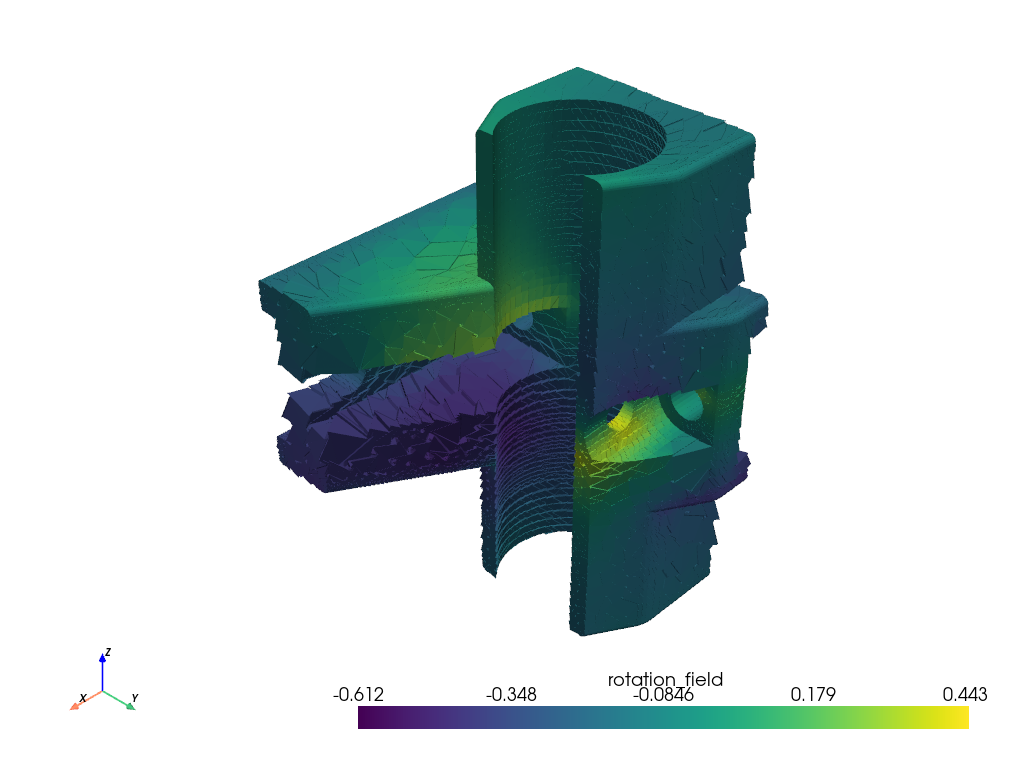

In [10]:

# Cell 5

def clearance_caps_from_path_length(
    tet,
    cap_near=np.deg2rad(45),   # near support (short path) can rotate more
    cap_far =np.deg2rad(15),   # far from support (long path) rotate much less
    gamma=1.5                  # steeper falloff => stricter caps far away
):
    d = tet.cell_data.get("cell_distance_to_bottom", None)
    if d is None:
        raise RuntimeError("cell_distance_to_bottom missing. Run calculate_path_length_to_base_gradient first (Cell 4).")

    d = d.astype(float)
    mask = ~np.isnan(d)
    caps = np.full(tet.number_of_cells, cap_near, dtype=float)
    if np.any(mask):
        d_norm = (d[mask] - np.nanmin(d[mask])) / max(np.nanmax(d[mask]) - np.nanmin(d[mask]), 1e-12)
        w = d_norm ** gamma                              # 0 near base → 1 far from base
        caps[mask] = cap_near - (cap_near - cap_far) * w # linear in w (could switch to smoothstep/sigmoid)
    return caps

def calculate_initial_rotation_field(tet, MAX_OVERHANG, ROTATION_MULTIPLIER, STEEP_OVERHANG_COMPENSATION, INITIAL_ROTATION_FIELD_SMOOTHING, SET_INITIAL_ROTATION_TO_ZERO, MAX_POS_ROTATION, MAX_NEG_ROTATION):
    '''
    Calculate the initial rotation field for each cell in the tetrahedral mesh to make overhangs less than MAX_OVERHANG.
    The direction of rotation ensures the part is printable.
    '''

    # create initial rotation field rotating faces to be in safe printing angle
    initial_rotation_field = np.full((tet.number_of_cells), np.nan)
    initial_rotation_field = np.abs(np.deg2rad(90+MAX_OVERHANG) - tet.cell_data['overhang_angle'])

    path_length_to_base_gradient = calculate_path_length_to_base_gradient(tet, MAX_OVERHANG, INITIAL_ROTATION_FIELD_SMOOTHING, SET_INITIAL_ROTATION_TO_ZERO)

    # if path_length_to_base_gradient is different to the cell's overhang direction, it needs to be rotated an additional amount (its overhang angle) to make it go the right way
    # Put behind a flag because it is normally not needed, and buggy/finnicky
    # Can try enable it for models with very steep overhangs (>90 degrees) (not common)
    if STEEP_OVERHANG_COMPENSATION:
        initial_rotation_field[tet.cell_data["in_air"]] += 2 * (np.deg2rad(180) - tet.cell_data['overhang_angle'][tet.cell_data["in_air"]])

    # # Apply the path_length_to_base_gradient (optimal overhang direction) to the initial rotation field
    initial_rotation_field *= path_length_to_base_gradient

    # apply rotation multiplier
    initial_rotation_field = np.clip(initial_rotation_field*ROTATION_MULTIPLIER, -np.deg2rad(360), np.deg2rad(360))

    # --- NEW: per-cell clearance caps (smaller cap when far from support)
    per_cell_caps = clearance_caps_from_path_length(
    tet,
    cap_near=np.deg2rad(45),   # tweak to taste / printer clearance
    cap_far =np.deg2rad(15),    # tighten if nozzle clearance still risky
    gamma=1.75
    )

    # clip to max rotation
    initial_rotation_field = np.clip(initial_rotation_field, MAX_NEG_ROTATION, MAX_POS_ROTATION)

    # Then clip by per-cell caps to enforce clearance in far regions
    initial_rotation_field = np.clip(initial_rotation_field, -per_cell_caps, per_cell_caps)


    tet.cell_data["initial_rotation_field"] = initial_rotation_field

    return initial_rotation_field

from scipy.sparse import lil_matrix

def calculate_rotation_matrices(tet, rotation_field):
    '''
    Calculate the rotation matrices for each cell in the tetrahedral mesh given the scalar
    rotation field that gives a rotation for each cell. Cells are rotated around the axis
    perpendicular to the radial direction and the z-axis.
    '''

    # create rotation matrix from theta around axis
    tangential_vectors = np.cross( np.array([0, 0, 1]), tet.cell_data["cell_center"][:, :2])
    # normalize
    tangential_vectors /= np.linalg.norm(tangential_vectors, axis=1)[:, None]
    # replace nan with [1,0,0]
    tangential_vectors[np.isnan(tangential_vectors).any(axis=1)] = [1, 0, 0]

    rotation_matrices = R.from_rotvec(rotation_field[:, None] * tangential_vectors).as_matrix()

    return rotation_matrices

def calculate_unique_vertices_rotated(tet, rotation_field):
    '''
    Calculate the vertices of a tetrahedral mesh after rotating each cell by the rotation field.
    Vertices are unique: they are not shared between cells.
    '''

    rotation_matrices = calculate_rotation_matrices(tet, rotation_field)

    # rotate each face by the rotation field around its center
    unique_vertices = np.zeros((tet.number_of_cells, 4, 3))
    for cell_index, cell in enumerate(tet.field_data["cells"]):
        unique_vertices[cell_index] = tet.field_data["cell_vertices"][cell]

    cell_centers = tet.cell_data["cell_center"]

    unique_vertices_rotated = cell_centers.reshape(-1, 1, 3, 1) + rotation_matrices.reshape(-1, 1, 3, 3) @ (unique_vertices.reshape(-1, 4, 3, 1) - cell_centers.reshape(-1, 1, 3, 1))
    # unique_vertices_rotated = rotation_matrices.reshape(-1, 1, 3, 3) @ unique_vertices.reshape(-1, 4, 3, 1)

    return unique_vertices_rotated

def apply_rotation_field_unique_vertices(tet, rotation_field):
    '''
    Apply the rotation field to the tetrahedral mesh and return a new tetrahedral mesh.
    Vertices are unique: they are not shared between cells.
    '''

    unique_vertices_rotated = calculate_unique_vertices_rotated(tet, rotation_field)

    unique_cells = np.zeros((tet.number_of_cells, 5), dtype=int)
    unique_cells[:, 0] = 4
    unique_cells[:, 1:] = np.arange(tet.number_of_cells*4).reshape(-1, 4)

    new_tet = pv.UnstructuredGrid(unique_cells.flatten(), np.full(tet.number_of_cells, pv.CellType.TETRA), unique_vertices_rotated.reshape(-1, 3))

    return new_tet

def apply_rotation_field(tet, rotation_field):
    '''
    Apply the rotation field to the tetrahedral mesh and return a new tetrahedral mesh.
    Vertices are shared between cells, so the surface is closed and smooth.
    '''

    new_vertices = np.zeros((tet.number_of_points, 3))
    vertices_count = np.zeros((tet.number_of_points))
    for cell in tet.field_data["cells"]:
        vertices_count[cell] += 1

    unique_vertices_rotated = calculate_unique_vertices_rotated(tet, rotation_field)

    for cell_index, vertices in enumerate(unique_vertices_rotated):
        for i, vertex in enumerate(vertices):
            new_vertices[tet.field_data["cells"][cell_index, i]] += vertex.T[0] / vertices_count[tet.field_data["cells"][cell_index][i]]

    new_tet = pv.UnstructuredGrid(tet.cells, np.full(tet.number_of_cells, pv.CellType.TETRA), new_vertices)

    return new_tet


def optimize_rotations(tet, NEIGHBOUR_LOSS_WEIGHT, MAX_OVERHANG, ROTATION_MULTIPLIER, ITERATIONS, SAVE_GIF, STEEP_OVERHANG_COMPENSATION, INITIAL_ROTATION_FIELD_SMOOTHING, SET_INITIAL_ROTATION_TO_ZERO, MAX_POS_ROTATION, MAX_NEG_ROTATION):
    '''
    Optimize the rotation field for each cell in the tetrahedral mesh to make overhangs less
    than MAX_OVERHANG while keeping the rotation field smooth.
    '''

    imgs = []
    plotter = pv.Plotter(off_screen=True)
    if SAVE_GIF:
        plotter.open_gif(f'gifs/{model_name}_optimize_rotations.gif')

    initial_rotation_field = calculate_initial_rotation_field(tet, MAX_OVERHANG, ROTATION_MULTIPLIER, STEEP_OVERHANG_COMPENSATION, INITIAL_ROTATION_FIELD_SMOOTHING, SET_INITIAL_ROTATION_TO_ZERO, MAX_POS_ROTATION, MAX_NEG_ROTATION)
    num_cells_with_initial_rotation = np.sum(~np.isnan(initial_rotation_field))

    def save_gif(rotation_field):
        new_tet = apply_rotation_field_unique_vertices(tet, rotation_field)
        new_tet.cell_data["rotation_field"] = rotation_field
        mesh_actor = plotter.add_mesh(new_tet,  clim=[-np.pi/4, np.pi/4], scalars="rotation_field", lighting=False)
        plotter.write_frame()
        plotter.remove_actor(mesh_actor)

    def objective_function(rotation_field):
        '''
        Objective function to minimize the neighbour losses and initial rotation losses.
        '''
        if SAVE_GIF:
            save_gif(rotation_field)

        # Compute neighbour losses using vectorized operations
        cell_face_neighbours = tet.field_data["cell_face_neighbours"]
        neighbour_differences = rotation_field[cell_face_neighbours[:, 0]] - rotation_field[cell_face_neighbours[:, 1]]
        neighbour_losses = NEIGHBOUR_LOSS_WEIGHT * neighbour_differences**2

        # Compute the initial rotation losses
        overhanging_mask = tet.cell_data['overhang_angle'] > np.deg2rad(90 + MAX_OVERHANG)
        valid_cell_indices = np.where(~np.isnan(initial_rotation_field))[0]#np.where(overhanging_mask)[0]
        initial_rotation_losses = (rotation_field[valid_cell_indices] - initial_rotation_field[valid_cell_indices])**2

        # Return the concatenated losses
        return np.concatenate((neighbour_losses, initial_rotation_losses))


    def objective_jacobian(rotation_field):
        start_time = time.time()
        # Initialize the sparse matrix with LIL format for efficient row-wise operations
        cell_face_neighbours = tet.field_data["cell_face_neighbours"]
        jac = lil_matrix((len(cell_face_neighbours) + num_cells_with_initial_rotation, tet.number_of_cells), dtype=np.float32)

        # Vectorized computation for neighbour loss derivatives
        cell_1 = cell_face_neighbours[:, 0]
        cell_2 = cell_face_neighbours[:, 1]

        # Compute the differences
        differences = rotation_field[cell_1] - rotation_field[cell_2]

        # Fill in the Jacobian for the first derivative of the neighbour loss function
        jac[range(len(cell_face_neighbours)), cell_1] = 2 * NEIGHBOUR_LOSS_WEIGHT * differences
        jac[range(len(cell_face_neighbours)), cell_2] = -2 * NEIGHBOUR_LOSS_WEIGHT * differences

        # Vectorized computation for initial rotation loss derivatives
        overhanging_mask = tet.cell_data['overhang_angle'] > np.deg2rad(90 + MAX_OVERHANG)
        valid_cell_indices = np.where(~np.isnan(initial_rotation_field))[0]#np.where(overhanging_mask)[0]

        # Fill in the Jacobian for the first derivative of the initial rotation loss function
        jac[len(cell_face_neighbours) + np.arange(len(valid_cell_indices)), valid_cell_indices] = \
            2 * (rotation_field[valid_cell_indices] - initial_rotation_field[valid_cell_indices])

        # print("Jacobian time:", time.time() - start_time)
        # Convert the LIL matrix to CSR format for efficient computations in further steps
        return jac.tocsr()

    def jac_sparsity():
        cell_face_neighbours = tet.field_data["cell_face_neighbours"]
        sparsity = lil_matrix((len(cell_face_neighbours) + num_cells_with_initial_rotation, tet.number_of_cells), dtype=np.int8)

        for i, (cell_1, cell_2) in enumerate(cell_face_neighbours):
            sparsity[i, cell_1] = 1
            sparsity[i, cell_2] = 1

        valid_cell_indices = np.where(~np.isnan(initial_rotation_field))[0]#np.where(overhanging_mask)[0]
        i = 0
        for cell_index, initial_rotation in enumerate(initial_rotation_field):
            if cell_index in valid_cell_indices:
                sparsity[len(cell_face_neighbours) + i, cell_index] = 1
                i += 1

        return sparsity.tocsr()

    # smoothed_rotation_field = np.zeros((tet.number_of_cells))

    # Build per-cell caps (same parameters as above to stay consistent)
    per_cell_caps = clearance_caps_from_path_length(
        tet,
        cap_near=np.deg2rad(45),
        cap_far =np.deg2rad(15),
        gamma=1.75
    )

    lower_bounds = -per_cell_caps
    upper_bounds =  per_cell_caps

    # Initial guess (you used zeros). You can also seed with the clipped initial field:
    smoothed_rotation_field = np.zeros((tet.number_of_cells), dtype=float)

    # Optimization process to smooth the initial rotation field
    result = least_squares(objective_function,
                    smoothed_rotation_field,
                    jac=objective_jacobian,
                    max_nfev=ITERATIONS,
                    jac_sparsity=jac_sparsity(),
                    verbose=2,
                    method='trf',
                    ftol=1e-6,
                    bounds=(lower_bounds, upper_bounds)   # <-- enforce clearance during solve
                    )

    # render array of numpy images (imgs) into gif
    if SAVE_GIF:
        plotter.close()

    return result.x

NEIGHBOUR_LOSS_WEIGHT = 20 # the larger the weight, the more the rotation field will be smoothed
MAX_OVERHANG = 30          # the maximum overhang angle in degrees
ROTATION_MULTIPLIER = 2   # the larger the multiplier, the more the rotation field will be rotated
SET_INITIAL_ROTATION_TO_ZERO = False # reduces influence of initial rotation field on non-overhanging tetrahedrons. good when initial rotation field is noisy
INITIAL_ROTATION_FIELD_SMOOTHING = 30
MAX_POS_ROTATION = np.deg2rad(3600) # normally set to 360 unless you get collisions
MAX_NEG_ROTATION = np.deg2rad(-3600) # normally set to 360 unless you get collisions
ITERATIONS = 100
SAVE_GIF = True
STEEP_OVERHANG_COMPENSATION = True

rotation_field = optimize_rotations(
    undeformed_tet,
    NEIGHBOUR_LOSS_WEIGHT,
    MAX_OVERHANG,
    ROTATION_MULTIPLIER,
    ITERATIONS,
    SAVE_GIF,
    STEEP_OVERHANG_COMPENSATION,
    INITIAL_ROTATION_FIELD_SMOOTHING,
    SET_INITIAL_ROTATION_TO_ZERO,
    MAX_POS_ROTATION,
    MAX_NEG_ROTATION
)
# rotation_field = calculate_initial_rotation_field(tet, MAX_OVERHANG, ROTATION_MULTIPLIER)
undeformed_tet_with_rotated_tetrahedrons = apply_rotation_field_unique_vertices(undeformed_tet, rotation_field)
undeformed_tet_with_rotated_tetrahedrons.cell_data["rotation_field"] = rotation_field
# new_tet.extract_cells(np.where(rotation_field != 0)[0]).plot()
undeformed_tet_with_rotated_tetrahedrons.plot(scalars="rotation_field")

default
```
NEIGHBOUR_LOSS_WEIGHT = 20 # the larger the weight, the more the rotation field will be smoothed
MAX_OVERHANG = 30          # the maximum overhang angle in degrees
ROTATION_MULTIPLIER = 2   # the larger the multiplier, the more the rotation field will be rotated
SET_INITIAL_ROTATION_TO_ZERO = False # reduces influence of initial rotation field on non-overhanging tetrahedrons. good when initial rotation field is noisy
```

benchy upsidedown tilted
scale: 1.5
Iteration 1:
```
NEIGHBOUR_LOSS_WEIGHT = 100 # the larger the weight, the more the rotation field will be smoothed
MAX_OVERHANG = 5          # the maximum overhang angle in degrees
ROTATION_MULTIPLIER = 1   # the larger the multiplier, the more the rotation field will be rotated
SET_INITIAL_ROTATION_TO_ZERO = True # reduces influence of initial rotation field on non-overhanging tetrahedrons. good when initial rotation field is noisy
INITIAL_ROTATION_FIELD_SMOOTHING = 30
```

Iteration 2:
```
NEIGHBOUR_LOSS_WEIGHT = 50 # the larger the weight, the more the rotation field will be smoothed
MAX_OVERHANG = 5          # the maximum overhang angle in degrees
ROTATION_MULTIPLIER = 1   # the larger the multiplier, the more the rotation field will be rotated
SET_INITIAL_ROTATION_TO_ZERO = True # reduces influence of initial rotation field on non-overhanging tetrahedrons. good when initial rotation field is noisy
INITIAL_ROTATION_FIELD_SMOOTHING = 30
```

Iteration 3,4,5:
```
NEIGHBOUR_LOSS_WEIGHT = 50 # the larger the weight, the more the rotation field will be smoothed
MAX_OVERHANG = 50          # the maximum overhang angle in degrees
ROTATION_MULTIPLIER = 3   # the larger the multiplier, the more the rotation field will be rotated
SET_INITIAL_ROTATION_TO_ZERO = True # reduces influence of initial rotation field on non-overhanging tetrahedrons. good when initial rotation field is noisy
INITIAL_ROTATION_FIELD_SMOOTHING = 30
```

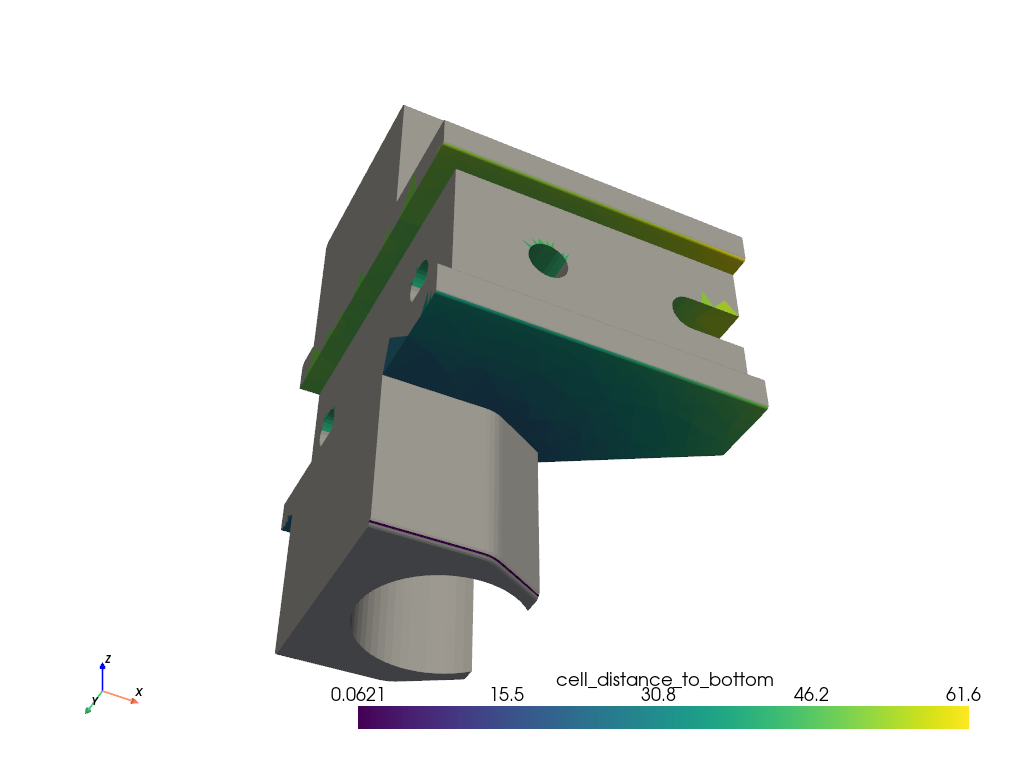

In [11]:
# Cell 6
# view the initial rotation field we are trying to optimize towards
# tet.extract_cells(tet.cell_data['overhang_angle'] > np.deg2rad(90 + MAX_OVERHANG)).plot(scalars="initial_rotation_field")
# tet.cell_data['overhang_angle'] > np.deg2rad(90 + MAX_OVERHANG)
# undeformed_tet.plot(scalars="initial_rotation_field")
# undeformed_tet.plot(scalars="in_air")
undeformed_tet.plot(scalars="cell_distance_to_bottom", cpos=[-0.5, -1, -1])
# undeformed_tet.plot(scalars="overhang_angle")
# undeformed_tet.plot(scalars="path_length_to_base_gradient")
# undeformed_tet.plot(scalars=new_tet1.cell_data['rotation_field'])

def show_path_to_base(tet, cell_index, plotter=pv.Plotter()):
    path_to_bottom = tet.cell_data['path_to_bottom'][cell_index]
    first_negative_index = np.where(path_to_bottom == -1)[0][0]
    path_to_bottom = path_to_bottom[:first_negative_index]
    print(path_to_bottom)

    for i in range(len(path_to_bottom)-1):
        path_to_base = pv.Line(tet.cell_data["cell_center"][path_to_bottom[i]], tet.cell_data["cell_center"][path_to_bottom[i+1]])
        plotter.add_mesh(path_to_base, color="red")

    plotter.add_mesh(tet, opacity=0.2)
    plotter.show()

# show_path_to_base(tet, np.where(tet.cell_data['has_face'].astype(bool) & (tet.cell_data["overhang_angle"] > 3))[0][7])

def show_path_to_base_gradient_calculation(tet, cell_indices):
    plotter = pv.Plotter()
    scalar = np.full(tet.number_of_cells, 0.0)

    for cell_index in cell_indices:
        local_cells = cell_neighbour_dict["edge"][cell_index]
        local_cells = np.hstack((local_cells, cell_index))
        local_cells_with_path_lengths = [x for x in local_cells if not np.isnan(tet.cell_data['cell_distance_to_bottom'][x])]
        path_lengths = tet.cell_data['cell_distance_to_bottom'][local_cells_with_path_lengths]

        cell_centers = tet.cell_data["cell_center"][local_cells_with_path_lengths]
        cell_centers_z_is_path_length = cell_centers.copy()
        cell_centers_z_is_path_length[:, 2] = path_lengths - np.min(path_lengths) + np.min(cell_centers[:, 2])
        points = pv.PolyData(cell_centers_z_is_path_length)
        glyph = points.glyph(geom=pv.Sphere(theta_resolution=8, phi_resolution=8, radius=0.1))

        if len(cell_centers_z_is_path_length) < 3:
            continue

        p, n = planeFit(cell_centers_z_is_path_length.T)
        plane = pv.Plane(center=p, direction=n, i_size=4, j_size=4)
        normal_arrow = pv.Arrow(start=p, direction=n, scale=1.5)

        # reflect arrow across xy plane
        reflected_n = -n - 2 * (np.dot(-n, up_vector)) * up_vector

        # extract radial component
        cell_center_direction_normalized = tet.cell_data["cell_center"][cell_index, :2] / np.linalg.norm(tet.cell_data["cell_center"][cell_index, :2])
        gradient_in_radial_direction = np.dot(cell_center_direction_normalized, reflected_n[:2]) * cell_center_direction_normalized
        nozzle_arrow = pv.Arrow(start=tet.cell_data["cell_center"][cell_index], direction=np.hstack((gradient_in_radial_direction, reflected_n[2])), scale=1)


        # plotter.add_mesh(glyph, color="blue", opacity=0.5, )
        # plotter.add_mesh(plane, color="green", opacity=0.2)
        # plotter.add_mesh(normal_arrow, color="orange")
        plotter.add_mesh(nozzle_arrow, color="red")
    scalar[local_cells_with_path_lengths] = 0.5
    scalar[cell_index] = 1
    plotter.add_mesh(tet, opacity=0.2, scalars=scalar, cmap="binary")
    plotter.show()

# show_path_to_base_gradient_calculation(undeformed_tet, [np.where(tet.cell_data['has_face'].astype(bool) & (tet.cell_data["overhang_angle"] > 3))[0][1]])
# show_path_to_base_gradient_calculation(undeformed_tet, np.where(tet.cell_data['has_face'].astype(bool) & (tet.cell_data["overhang_angle"] > np.deg2rad(90 + MAX_OVERHANG)))[0])

def show_dijkstras(tet, cell_index):
    plotter = pv.Plotter()#window_size=[3840, 2160])
    lines = []
    for neighbour in tet.field_data["cell_face_neighbours"]:
        lines += [tet.cell_data["cell_center"][neighbour[0]], tet.cell_data["cell_center"][neighbour[1]]]
    mesh = pv.line_segments_from_points(lines)
    plotter.add_mesh(mesh, color="grey", opacity=0.4)

    points = pv.PolyData(tet.cell_data["cell_center"])
    glyph = points.glyph(geom=pv.Sphere(theta_resolution=8, phi_resolution=8, radius=0.1))
    plotter.add_mesh(glyph, color="red", opacity=0.2)

    if cell_index is None:
        plotter.show()
        return

    plotter.camera_position = "xz"

    # run dijkstra's algorithm and visualize
    plotter.open_gif(f'gifs/{model_name}_dijkstra.gif')
    distances, paths = nx.single_source_dijkstra(cell_neighbour_graph, cell_index)
    dijkstra_actors = []
    for i in np.arange(0, tet.cell_data['cell_distance_to_bottom'][cell_index], 0.2):
        nodes_in_range = [node for node, distance in distances.items() if distance < i]
        if len(nodes_in_range) == 0:
            continue
        if set(nodes_in_range) & set(bottom_cells):
            break
        points = pv.PolyData(tet.cell_data["cell_center"][nodes_in_range])
        glyph = points.glyph(geom=pv.Sphere(theta_resolution=8, phi_resolution=8, radius=0.2))
        actor = plotter.add_mesh(glyph, color="blue", opacity=0.4)
        dijkstra_actors.append(actor)
        plotter.write_frame()


    path_to_bottom = tet.cell_data['path_to_bottom'][cell_index]
    first_negative_index = np.where(path_to_bottom == -1)[0][0]
    path_to_bottom = path_to_bottom[:first_negative_index]
    print(path_to_bottom)

    for i in range(len(path_to_bottom)-1):
        path_to_base = pv.Line(tet.cell_data["cell_center"][path_to_bottom[i]], tet.cell_data["cell_center"][path_to_bottom[i+1]])
        plotter.add_mesh(path_to_base, color="blue", line_width=5)

    for actor in dijkstra_actors:
        plotter.remove_actor(actor)

    plotter.write_frame()

    plotter.show()
    plotter.close()


# show_dijkstras(undeformed_tet, np.where(tet.cell_data['has_face'].astype(bool) & (tet.cell_data["overhang_angle"] > 3))[0][1])

/tmp/ipython-input-1711135951.py:75: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  tangential_vectors = np.cross( np.array([0, 0, 1]), tet.cell_data["cell_center"][:, :2])


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.3499e+03                                    3.63e+02    
       1              5         7.7855e+03      5.64e+02       4.74e+00       3.41e+02    
       2              6         6.8549e+03      9.31e+02       4.79e+00       3.03e+02    
       3              7         5.5590e+03      1.30e+03       8.68e+00       2.36e+02    
       4              8         4.5781e+03      9.81e+02       8.31e+00       2.54e+02    
       5              9         3.7776e+03      8.01e+02       8.60e+00       1.36e+02    
       6             10         3.2080e+03      5.70e+02       9.21e+00       1.02e+02    
       7             11         2.8299e+03      3.78e+02       9.57e+00       1.00e+02    
       8             12         2.4655e+03      3.64e+02       9.54e+00       5.83e+01    
       9             13         2.2388e+03      2.27e+02       1.01e+01       1.03e+02    

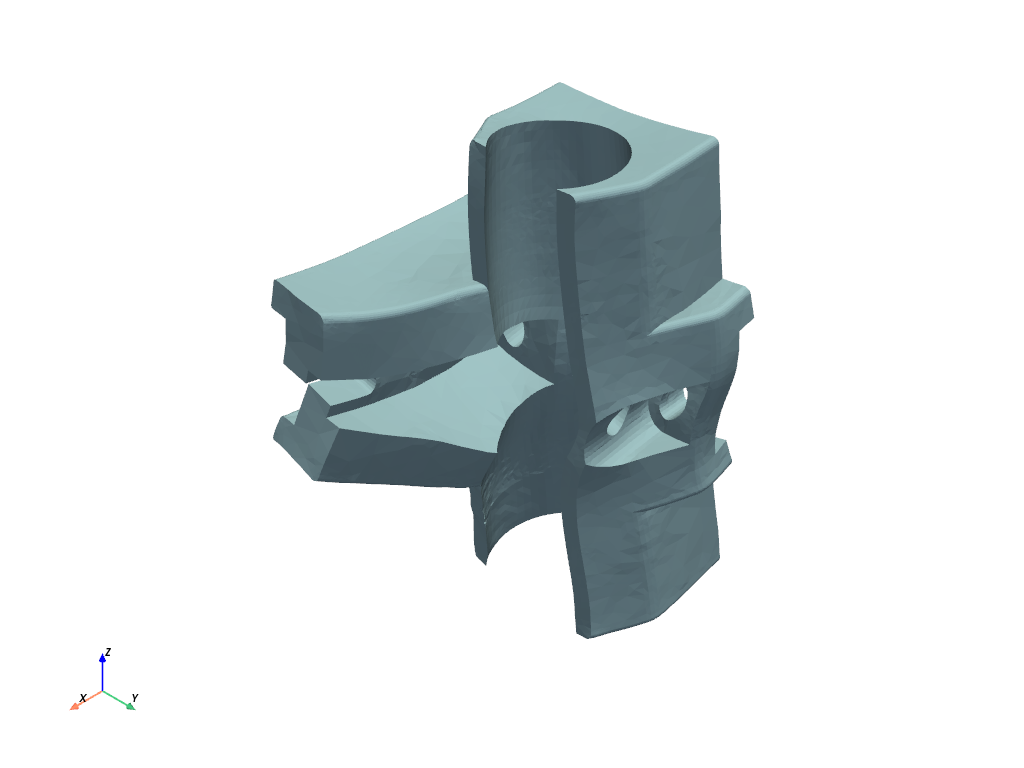

In [12]:
# Cell 7
N = np.eye(4) - 1/4 * np.ones((4, 4)) # the N matrix centers the vertices of a tetrahedron around the origin

save_gif_i = 0

def calculate_deformation(tet, rotation_field, ITERATIONS, SAVE_GIF):
    '''
    Try to find the optimal deformation of the tetrahedral mesh to make cells have the same rotation as
    the given rotation field.

    Our parameters are the vertices of the deformed mesh.
    '''

    new_vertices = tet.points.copy()

    params = new_vertices.flatten()

    rotation_matrices = calculate_rotation_matrices(tet, rotation_field)

    # Extract old vertices for all cells
    old_vertices = tet.field_data["cell_vertices"][tet.field_data["cells"]]
    # Apply the transformation for all cells
    old_vertices_transformed = np.einsum('ijk,ikl->ijl', rotation_matrices, (N @ old_vertices).transpose(0, 2, 1))

    plotter = pv.Plotter(off_screen=True)

    if SAVE_GIF:
        plotter.open_gif(f'gifs/{model_name}_calculate_deformation.gif')

    def save_gif(new_vertices):
        global save_gif_i
        save_gif_i += 1

        if save_gif_i % 10 != 0:
            return

        new_tet = pv.UnstructuredGrid(tet.cells, np.full(tet.number_of_cells, pv.CellType.TETRA), new_vertices)
        mesh_actor = plotter.add_mesh(new_tet)
        plotter.write_frame()
        plotter.remove_actor(mesh_actor)


    def objective_function(params):
        start_time = time.time()

        new_vertices = params[:tet.number_of_points * 3].reshape(-1, 3)

        if SAVE_GIF:
            save_gif(new_vertices)

        # Apply transformation for the new vertices
        new_vertices_transformed = (N @ new_vertices[tet.field_data["cells"]]).transpose(0, 2, 1)

        # Calculate position compatibility loss using vectorized operations
        position_losses = np.linalg.norm(new_vertices_transformed - old_vertices_transformed, axis=(1, 2))**2

        # print(f"Objective function took {time.time() - start_time} seconds")
        return position_losses

    def objective_jacobian(params):
        start_time = time.time()

        # Initialize Jacobian matrix
        J = lil_matrix((tet.number_of_cells, len(params)), dtype=np.float32)

        # Extract parameters
        new_vertices = params[:tet.number_of_points * 3].reshape(-1, 3)

        # Extract old vertices for all cells
        old_vertices = tet.field_data["cell_vertices"][tet.field_data["cells"]]

        # Apply the transformation for old and new vertices
        new_vertices_transformed = (N @ new_vertices[tet.field_data["cells"]]).transpose(0, 2, 1)

        # Compute the difference between transformed new and old vertices
        diff = new_vertices_transformed - old_vertices_transformed  # shape: (num_cells, 3, num_vertices_per_cell)

        # Reshape diff for easier broadcasting
        diff = diff.transpose(0, 2, 1)  # shape: (num_cells, num_vertices_per_cell, 3)

        # Now, for each cell, update the corresponding rows in the Jacobian
        cell_indices = np.repeat(np.arange(tet.number_of_cells), len(tet.field_data["cells"][0]))  # Cell indices repeated per vertex
        vertex_indices = np.ravel(tet.field_data["cells"])  # Flatten the cell-to-vertex mapping

        # For each component x, y, z in the vertex, update the Jacobian
        for dim in range(3):
            J[cell_indices, vertex_indices * 3 + dim] = 2 * diff[:, :, dim].ravel()

        # print(f"Objective jacobian took {time.time() - start_time} seconds")
        return J.tocsr()

    def jac_sparsity():
        sparsity = lil_matrix((tet.number_of_cells, len(params)), dtype=np.int8)

        cell_indices = np.repeat(np.arange(tet.number_of_cells), len(tet.field_data["cells"][0]))
        vertex_indices = np.ravel(tet.field_data["cells"])

        for dim in range(3):
            sparsity[cell_indices, vertex_indices * 3 + dim] = 1

        return sparsity.tocsr()

    result = least_squares(objective_function,
                    params,
                    max_nfev=ITERATIONS,
                    verbose=2,
                    jac=objective_jacobian,
                    jac_sparsity=jac_sparsity(),
                    method='trf',
                    x_scale='jac',
                    )

    plotter.close()

    return result.x[:tet.number_of_points*3].reshape(-1, 3)

ITERATIONS = 1000
SAVE_GIF = True
new_vertices = calculate_deformation(undeformed_tet, rotation_field, ITERATIONS, SAVE_GIF)
deformed_tet = pv.UnstructuredGrid(undeformed_tet.cells, np.full(undeformed_tet.number_of_cells, pv.CellType.TETRA), new_vertices)
deformed_tet.plot()

for key in undeformed_tet.field_data.keys():
    deformed_tet.field_data[key] = undeformed_tet.field_data[key]
for key in undeformed_tet.cell_data.keys():
    deformed_tet.cell_data[key] = undeformed_tet.cell_data[key]
deformed_tet = update_tet_attributes(deformed_tet)

Run below to do another iteration

In [13]:
# Cell 8
undeformed_tet = deformed_tet.copy()

Run below when finished deforming to save mesh as STL

In [14]:
# Cell 9
# make origin center bottom of bounding box
x_min, x_max, y_min, y_max, z_min, z_max = deformed_tet.bounds
offsets_applied = np.array([(x_min + x_max) / 2, (y_min + y_max) / 2, z_min])
deformed_tet.points -= offsets_applied

deformed_tet.extract_surface().save(f'output_models/{model_name}_deformed_tet.stl')

In [15]:
# Cell 10
# save to pickle
with open(f'pickle_files/deformed_{model_name}.pkl', 'wb') as f:
    pickle.dump(deformed_tet, f)

# Now, go and slice the stl file in Cura!

Settings:
- Make the printer origin at the center of the buildplate
- Dont use any pre/post scripts, z hop, etc. The config I use is provided in the github repo
- Autoplace the model at the center by clicking "Arrange All Models"

In [16]:
# Cell 11
deformed_tet = pickle.load(open(f'pickle_files/deformed_{model_name}.pkl', 'rb'))

In [17]:
# def tetrahedron_volume(p1, p2, p3, p4):
#     '''
#     Calculate the volume of the tetrahedron formed by four points
#     '''

#     mat = np.vstack([p2 - p1, p3 - p1, p4 - p1])
#     return np.abs(np.linalg.det(mat)) / 6

# def calc_barycentric_coordinates(tet_a, tet_b, tet_c, tet_d, point):
#     '''
#     Calculate the barycentric coordinates of a point in a tetrahedron. This is used to interpolate
#     parameters from the vertices of the tetrahedron to a point within the tetrhedron.
#     '''

#     total_volume = tetrahedron_volume(tet_a, tet_b, tet_c, tet_d)

#     if total_volume == 0:
#         raise ValueError("The points do not form a valid tetrahedron (zero volume).")

#     # Calculate the sub-volumes for each face
#     vol_a = tetrahedron_volume(point, tet_b, tet_c, tet_d)
#     vol_b = tetrahedron_volume(point, tet_a, tet_c, tet_d)
#     vol_c = tetrahedron_volume(point, tet_a, tet_b, tet_d)
#     vol_d = tetrahedron_volume(point, tet_a, tet_b, tet_c)

#     # Calculate barycentric coordinates as the ratio of sub-volumes to total volume
#     lambda_a = vol_a / total_volume
#     lambda_b = vol_b / total_volume
#     lambda_c = vol_c / total_volume
#     lambda_d = vol_d / total_volume

#     # The barycentric coordinates should sum to 1
#     return np.array([lambda_a, lambda_b, lambda_c, lambda_d])

# def project_point_onto_plane(plane_x_axis, plane_y_axis, point):
#     projected_x = np.sum(plane_x_axis * point, axis=1)
#     projected_y = np.sum(plane_y_axis * point, axis=1)

#     return np.array([projected_x, projected_y]).T

In [18]:
# Cell 12
import numpy as np

def tetrahedron_volume(p1, p2, p3, p4):
    """
    Calculate the volume of a tetrahedron defined by four 3D points.
    Used in barycentric interpolation inside deformed/un-deformed meshes.

    Parameters:
        p1, p2, p3, p4 : np.ndarray
            3D coordinates of the tetrahedron vertices.

    Returns:
        float : Volume of the tetrahedron.
    """
    mat = np.vstack([p2 - p1, p3 - p1, p4 - p1])
    return np.abs(np.linalg.det(mat)) / 6.0


def calc_barycentric_coordinates(tet_a, tet_b, tet_c, tet_d, point):
    """
    Compute barycentric coordinates of a point inside a tetrahedron.
    These weights allow interpolation of deformation fields.

    Parameters:
        tet_a, tet_b, tet_c, tet_d : np.ndarray
            3D coordinates of tetrahedron vertices.
        point : np.ndarray
            3D coordinates of the point inside the tetrahedron.

    Returns:
        np.ndarray : (lambda_a, lambda_b, lambda_c, lambda_d)
                     Barycentric coordinates summing to 1.
    """
    total_volume = tetrahedron_volume(tet_a, tet_b, tet_c, tet_d)
    if total_volume == 0:
        raise ValueError("Degenerate tetrahedron: zero volume.")

    # Volumes of subtetrahedra formed with the point
    vol_a = tetrahedron_volume(point, tet_b, tet_c, tet_d)
    vol_b = tetrahedron_volume(point, tet_a, tet_c, tet_d)
    vol_c = tetrahedron_volume(point, tet_a, tet_b, tet_d)
    vol_d = tetrahedron_volume(point, tet_a, tet_b, tet_c)

    # Normalize
    lambda_a = vol_a / total_volume
    lambda_b = vol_b / total_volume
    lambda_c = vol_c / total_volume
    lambda_d = vol_d / total_volume

    return np.array([lambda_a, lambda_b, lambda_c, lambda_d])


def project_point_onto_plane(plane_x_axis, plane_y_axis, point):
    """
    Project a 3D point onto a 2D plane defined by X and Y axes.
    Used during slicing/deformation to express points in local coords.

    Parameters:
        plane_x_axis, plane_y_axis : np.ndarray
            Basis vectors defining the plane orientation.
        point : np.ndarray
            3D coordinates of the point to project.

    Returns:
        np.ndarray : [projected_x, projected_y]
    """
    projected_x = np.dot(plane_x_axis, point)
    projected_y = np.dot(plane_y_axis, point)
    return np.array([projected_x, projected_y])


In [19]:
# Cell 13
deformed_tet, _, _ = calculate_tet_attributes(deformed_tet)

In [20]:
# from pygcode import Line
# import time

# SEG_SIZE = 0.6 # mm
# MAX_ROTATION = 30 # degrees
# MIN_ROTATION = -130 # degrees
# NOZZLE_OFFSET = 42 # mm actuallt 41.5

# # find how each vertex in tet has been transformed
# vertex_transformations = deformed_tet.points - input_tet.points

# # calculate tangential vectors (axis of rotation) for each cell
# tangential_vectors = np.cross( np.array([0, 0, 1]), input_tet.cell_data["cell_center"][:, :2])
# # normalize
# tangential_vectors /= np.linalg.norm(tangential_vectors, axis=1)[:, None]
# # replace nan with [1,0,0]
# tangential_vectors[np.isnan(tangential_vectors).any(axis=1)] = [1, 0, 0]

# # calculate rotation for each vertex and cell
# num_cells_per_vertex = np.zeros((input_tet.number_of_points))
# for cell_index, cell in enumerate(input_tet.field_data["cells"]):
#     num_cells_per_vertex[cell] += 1
# vertex_rotations = np.zeros((deformed_tet.number_of_points))
# cell_rotations = np.zeros((deformed_tet.number_of_cells))
# for cell_index, cell in enumerate(deformed_tet.field_data["cells"]):
#     new_vertices = deformed_tet.field_data["cell_vertices"][cell]
#     new_cell_center = deformed_tet.cell_data["cell_center"][cell_index]
#     old_vertices = input_tet.field_data["cell_vertices"][cell]
#     old_cell_center = input_tet.cell_data["cell_center"][cell_index]

#     # center points
#     new_vertices -= new_cell_center
#     old_vertices -= old_cell_center

#     # project on to radial plane
#     plane_x_vector = old_cell_center[:2] / np.linalg.norm(old_cell_center[:2])
#     plane_x_vector = np.array([plane_x_vector[0], plane_x_vector[1], 0])
#     plane_y_vector = np.array([0,0,1])

#     new_vertices_projected = project_point_onto_plane(plane_x_vector, plane_y_vector, new_vertices)
#     old_vertices_projected = project_point_onto_plane(plane_x_vector, plane_y_vector, old_vertices)

#     # find rotation between the two sets of points using the kabsch algorithm
#     covariance_matrix = np.dot(new_vertices_projected.T, old_vertices_projected)
#     U, _, Vt = np.linalg.svd(covariance_matrix)
#     rotation_matrix = np.dot(U, Vt)

#     # get rotation angle from matrix 2x2
#     rotation = -np.arccos(min(max(rotation_matrix[0, 0], -1), 1))
#     if rotation_matrix[1, 0] < 0:
#         rotation = -rotation

#     rotation = max(min(rotation, np.deg2rad(MAX_ROTATION)), np.deg2rad(MIN_ROTATION))

#     cell_rotations[cell_index] = rotation

#     for vertex_index in cell:
#         vertex_rotations[vertex_index] += rotation / num_cells_per_vertex[vertex_index]

# # calculate z squish scale for each cell (ratio of z length after rotation to z length before rotation)
# tet_rotation_matrices = calculate_rotation_matrices(input_tet, cell_rotations)
# z_squish_scales = np.full((deformed_tet.number_of_cells), np.nan)
# for cell_index, cell in enumerate(deformed_tet.field_data["cells"]):
#     warped_vertices = deformed_tet.field_data["cell_vertices"][cell]
#     unwarped_vertices = input_tet.field_data["cell_vertices"][cell]

#     # rotate new vertices to align with old vertices
#     unwarped_vertices_rotated = (tet_rotation_matrices[cell_index].reshape(1, 3, 3) @ unwarped_vertices.reshape(4, 3, 1)).reshape(4, 3)

#     # calculate z squish scale
#     # z_squish_scales[cell_index] = (unwarped_vertices_rotated[:, 2].max() - unwarped_vertices_rotated[:, 2].min()) / (warped_vertices[:, 2].max() - warped_vertices[:, 2].min())
#     z_squish_scales[cell_index] = tetrahedron_volume(*unwarped_vertices) / tetrahedron_volume(*warped_vertices)
#     # z_squish_scales[cell_index] = min(z_squish_scales[cell_index], 5) # cap z squish scale


# # read gcode
# pos = np.array([0., 0., 20.])
# feed = 5000
# gcode_points = []
# with open(f'input_gcode/{model_name}_deformed_tet.gcode', 'r') as fh:
#     for line_text in fh.readlines():
#         line = Line(line_text)

#         if not line.block.gcodes:
#             continue

#         for gcode in sorted(line.block.gcodes):
#             if gcode.word == "G01" or gcode.word == "G00":
#                 prev_pos = pos.copy()

#                 if gcode.X is not None:
#                     pos[0] = gcode.X
#                 if gcode.Y is not None:
#                     pos[1] = gcode.Y
#                 if gcode.Z is not None:
#                     pos[2] = gcode.Z

#                 inv_time_feed = None
#                 # extract feed
#                 for word in line.block.words:
#                     if word.letter == "F":
#                         feed = word.value

#                 # extract extrusion
#                 extrusion = None
#                 for param in line.block.modal_params:
#                     if param.letter == "E":
#                         extrusion = param.value

#                 # segment moves
#                 # makes G1 (feed moves) less jittery
#                 delta_pos = pos - prev_pos
#                 distance = np.linalg.norm(delta_pos)
#                 if distance > 0:
#                     num_segments = -(-distance // SEG_SIZE) # hacky round up
#                     seg_distance = distance/num_segments

#                     # calculate inverse time feed
#                     time_to_complete_move = (1/feed) * seg_distance # min/mm * mm = min
#                     if time_to_complete_move == 0:
#                         inv_time_feed = None
#                     else:
#                         inv_time_feed = 1/time_to_complete_move # 1/min

#                     for i in range(int(num_segments)):
#                         gcode_points.append({
#                             "position": (prev_pos + delta_pos * (i+1) / num_segments),
#                             "command": gcode.word,
#                             "extrusion": extrusion/num_segments if extrusion is not None else None,
#                             "inv_time_feed": inv_time_feed,
#                             "move_length": seg_distance,
#                             "start_position": prev_pos,
#                             "end_position": pos,
#                             "unsegmented_move_length": distance,
#                             "after_retract": False,
#                             "feed": feed
#                         })
#                 else:
#                     # calculate inverse time feed
#                     time_to_complete_move = (1/feed) * distance # min/mm * mm = min
#                     if time_to_complete_move == 0:
#                         inv_time_feed = None
#                     else:
#                         inv_time_feed = 1/time_to_complete_move # 1/min

#                     gcode_points.append({
#                         "position": pos.copy(),
#                         "command": gcode.word,
#                         "extrusion": extrusion,
#                         "inv_time_feed": inv_time_feed,
#                         "move_length": distance,
#                         "unsegmented_move_length": distance,
#                         "after_retract": False,
#                         "feed": feed
#                     })

#                 # # add G0 in same spot after retraction (so we can use it for zhop later)
#                 # if gcode.word == "G01" and extrusion is not None and extrusion < 0:
#                 #     gcode_points.append({
#                 #         "position": pos.copy(),
#                 #         "command": "G00",
#                 #         "extrusion": None,
#                 #         "inv_time_feed": None,
#                 #         "move_length": 0,
#                 #         "after_retract": True
#                 #     })

# # calculate containging cell for each gcode point
# gcode_points_containing_cells = deformed_tet.find_containing_cell([point["position"] for point in gcode_points])

# # for cells with no containing cell, find the closest cell
# gcode_points_closest_cells = deformed_tet.find_closest_cell([point["position"] for point in gcode_points])
# # gcode_points_containing_cells[gcode_points_containing_cells == -1] = gcode_points_closest_cells[gcode_points_containing_cells == -1]

# # transform gcode points to original mesh's shape
# new_gcode_points = []
# prev_new_position = None
# travelling_over_air = False
# travelling = False
# prev_position = None
# prev_rotation = 0
# prev_travelling = False
# prev_command = "G00"
# ROTATION_AVERAGING_ALPHA = 0.2 # exponential moving average alpha for rotation
# RETRACTION_LENGTH = 1.0
# ROTATION_MAX_DELTA = np.deg2rad(1)
# MAX_EXTRUSION_MULTIPLIER = 10
# lost_vertices = []
# highest_printed_point = 0
# for cell_index, (gcode_point, containing_cell_index) in enumerate(zip(gcode_points, gcode_points_containing_cells)):
#     position = gcode_point["position"]
#     command = gcode_point["command"]
#     inv_time_feed = gcode_point["inv_time_feed"]
#     extrusion = gcode_point["extrusion"]

#     def barycentric_interpolate_to_get_new_position_and_rotation(position, containing_cell_index, command, cell_index):
#         if command == "G00" and containing_cell_index == -1: # Strict on travel moves being inside a tet
#             return None, None
#         if command == "G01" and containing_cell_index == -1: # Slightly more relaxed on printing moves
#             containing_cell_index = gcode_points_closest_cells[cell_index]

#         # get barycentric coordinates of pos in containing cell
#         vertiex_indices = deformed_tet.field_data["cells"][containing_cell_index]
#         cell_vertices = deformed_tet.field_data["cell_vertices"][vertiex_indices]
#         barycentric_coordinates = calc_barycentric_coordinates(cell_vertices[0], cell_vertices[1], cell_vertices[2], cell_vertices[3], position)

#         if np.sum(barycentric_coordinates) > 1.01:
#             return None, None

#         # calculate the new position of the point using the barycentric coordinates to weigh the vertex transformations
#         # multiply barycentric coordinates row-wise with vertex transformations
#         transformation = vertex_transformations[vertiex_indices] * barycentric_coordinates[:, None]

#         # sum columns
#         transformation = np.sum(transformation, axis=0)
#         # apply to pos
#         new_position = position - transformation

#         # do the same for rotation
#         rotation = np.sum(vertex_rotations[vertiex_indices] * barycentric_coordinates)

#         return new_position, rotation

#     dont_smooth_rotation = False
#     new_position, rotation = barycentric_interpolate_to_get_new_position_and_rotation(position, containing_cell_index, command, cell_index)
#     if new_position is None:
#         if command == "G01":
#             lost_vertices.append(position)
#             continue
#         elif command == "G00" and not travelling_over_air and prev_new_position is not None:
#             new_position = np.array([prev_new_position[0], prev_new_position[1], highest_printed_point]) # z hop over gap
#             rotation = max(min(prev_rotation, np.deg2rad(45)), np.deg2rad(-45)) # set rotation to a max of 45 because if rotation is very large, the extruder can "hang below" the nozzle and hit the part
#             dont_smooth_rotation = True # force rotation immediately
#             travelling_over_air = True
#         elif travelling_over_air:
#             continue
#         else:
#             continue
#     else:
#         if travelling_over_air:
#             new_position[2] = highest_printed_point # finish z hop over gap
#             rotation = max(min(rotation, np.deg2rad(45)), np.deg2rad(-45)) # set rotation to 0 because if rotation is very large, the extruder can "hang below" the nozzle and hit the part
#             dont_smooth_rotation = True # force rotation immediately
#         travelling_over_air = False

#     extrusion_multiplier = 1
#     if extrusion is not None and extrusion != RETRACTION_LENGTH and extrusion != -RETRACTION_LENGTH:

#         # scale extrusion by z_squish_scale
#         extrusion_multiplier = extrusion_multiplier * z_squish_scales[containing_cell_index]
#         extrusion = extrusion * min(extrusion_multiplier, MAX_EXTRUSION_MULTIPLIER)
#     elif extrusion == -RETRACTION_LENGTH:
#         travelling = True
#     elif extrusion == RETRACTION_LENGTH:
#         travelling = False
#     if prev_rotation is not None and not dont_smooth_rotation:
#         rotation = ROTATION_AVERAGING_ALPHA * rotation + (1 - ROTATION_AVERAGING_ALPHA) * prev_rotation

#     # if rotation delta between points is too high, add intermediate interpolation points to prevent nozzle from hitting part as rotating
#     if prev_rotation is not None and prev_new_position is not None and np.abs(rotation - prev_rotation) > ROTATION_MAX_DELTA:
#         delta_rotation = rotation - prev_rotation
#         num_interpolations = int(np.abs(delta_rotation) / ROTATION_MAX_DELTA) + 1
#         delta_pos = new_position - prev_new_position
#         for i in range(num_interpolations):
#             new_gcode_points.append({
#                 "position": prev_new_position + (delta_pos * ((i+1) / num_interpolations)),
#                 "original_position": position,
#                 "rotation": prev_rotation + (delta_rotation * ((i+1) / num_interpolations)),
#                 "command": prev_command,
#                 "extrusion": extrusion/num_interpolations if extrusion is not None else None,
#                 "inv_time_feed": inv_time_feed * num_interpolations if inv_time_feed is not None else None,
#                 "extrusion_multiplier": extrusion_multiplier,
#                 "feed": gcode_point["feed"],
#                 "travelling": prev_travelling
#             })
#     else:
#         new_gcode_points.append({
#             "position": new_position,
#             "original_position": position,
#             "rotation": rotation,
#             "command": command,
#             "extrusion": extrusion,
#             "inv_time_feed": inv_time_feed,
#             "extrusion_multiplier": extrusion_multiplier,
#             "feed": gcode_point["feed"],
#             "travelling": travelling
#         })

#     prev_rotation = rotation
#     prev_new_position = new_position.copy()
#     prev_travelling = travelling
#     prev_command = command

#     if command == "G01" and extrusion is not None and extrusion > 0 and (highest_printed_point != 0 or new_position[2] < 1):
#         highest_printed_point = max(highest_printed_point, new_position[2])


# print(f"Lost {len(lost_vertices)} vertices")

In [21]:
# print((input_tet.field_data["cells"]))

In [23]:
# Cell 14
import numpy as np
from pygcode import Line
import os

# ---------- CONFIG ----------
SEG_SIZE = 0.6
NOZZLE_OFFSET = 41.5
RETRACTION_LENGTH = 1.0
MAX_EXTRUSION_MULTIPLIER = 10
INPUT_GCODE_PATH = f'input_gcode/PI3MK3M_Test_body_deformed_tet15.gcode'
OUTPUT_GCODE_PATH = f'output_gcode/{model_name}_josh.gcode'
os.makedirs('output_gcode', exist_ok=True)
# ----------------------------

vertex_transformations = deformed_tet.points - input_tet.points

z_squish_scales = np.full((deformed_tet.number_of_cells), np.nan)
for cell_index, cell in enumerate(deformed_tet.field_data["cells"]):
    warped_vertices = deformed_tet.field_data["cell_vertices"][cell]
    unwarped_vertices = input_tet.field_data["cell_vertices"][cell]
    try:
        vol_unwarped = tetrahedron_volume(*unwarped_vertices)
        vol_warped = tetrahedron_volume(*warped_vertices)
        if vol_warped <= 0 or vol_unwarped <= 0:
            z_squish_scales[cell_index] = 1.0
        else:
            z_squish_scales[cell_index] = vol_unwarped / vol_warped
    except Exception:
        z_squish_scales[cell_index] = 1.0

# ---------- Parse input G-code ----------
pos = np.array([0, 0, 20.])
feed = 5000
gcode_points = []
non_movement_lines = []   # keep all original non-movement lines

with open(INPUT_GCODE_PATH, 'r') as fh:
    for line_text in fh.readlines():
        stripped = line_text.strip()
        try:
            line = Line(line_text)
        except Exception:
            non_movement_lines.append(line_text)
            continue

        if not line.block.gcodes:
            non_movement_lines.append(line_text)
            continue

        parsed_as_movement = False
        for gcode in sorted(line.block.gcodes):
            if gcode.word in ("G01", "G1", "G00", "G0"):
                parsed_as_movement = True
                prev_pos = pos.copy()

                if gcode.X is not None: pos[0] = float(gcode.X)
                if gcode.Y is not None: pos[1] = float(gcode.Y)
                if gcode.Z is not None: pos[2] = float(gcode.Z)

                for word in line.block.words:
                    if word.letter == "F":
                        feed = float(word.value)

                extrusion = None
                for param in line.block.modal_params:
                    if param.letter == "E":
                        extrusion = float(param.value)

                command = "G0" if gcode.word in ("G00", "G0") else "G1"

                delta_pos = pos - prev_pos
                distance = np.linalg.norm(delta_pos)
                if distance > 0:
                    num_segments = int(np.ceil(distance / SEG_SIZE))
                    seg_distance = distance / num_segments
                    for i in range(num_segments):
                        seg_pos = prev_pos + delta_pos * ((i + 1) / num_segments)
                        seg_extrusion = (extrusion / num_segments) if extrusion is not None else None
                        gcode_points.append({
                            "position": seg_pos.copy(),
                            "command": command,
                            "extrusion": seg_extrusion,
                            "move_length": seg_distance,
                            "start_position": prev_pos.copy(),
                            "end_position": pos.copy(),
                            "unsegmented_move_length": distance,
                            "feed": feed
                        })
                else:
                    gcode_points.append({
                        "position": pos.copy(),
                        "command": command,
                        "extrusion": extrusion,
                        "move_length": 0.0,
                        "unsegmented_move_length": 0.0,
                        "feed": feed
                    })
        if not parsed_as_movement:
            non_movement_lines.append(line_text)

# ---------- Inverse deformation ----------
new_gcode_points = []
lost_vertices = []
fallback_count = 0
highest_printed_point = 0.0
prev_position = None
travelling = False

def barycentric_interpolate_position(position, containing_cell_index, idx):
    if containing_cell_index == -1:
        containing_cell_index = gcode_points_closest_cells[idx]
        if containing_cell_index == -1:
            return None
    vert_indices = deformed_tet.field_data["cells"][containing_cell_index]
    cell_vertices = deformed_tet.field_data["cell_vertices"][vert_indices]
    bary_coords = calc_barycentric_coordinates(
        cell_vertices[0], cell_vertices[1], cell_vertices[2], cell_vertices[3], position
    )
    if np.any(np.isnan(bary_coords)) or np.sum(bary_coords) > 1.01:
        return None
    transformation = vertex_transformations[vert_indices] * bary_coords[:, None]
    transformation = np.sum(transformation, axis=0)
    new_pos = position - transformation
    return new_pos, containing_cell_index

gcode_point_positions = [pt["position"] for pt in gcode_points]
gcode_points_containing_cells = deformed_tet.find_containing_cell(gcode_point_positions)
gcode_points_closest_cells = deformed_tet.find_closest_cell(gcode_point_positions)

for idx, (gcode_point, containing_cell_index) in enumerate(zip(gcode_points, gcode_points_containing_cells)):
    position = np.array(gcode_point["position"], dtype=float)
    command = gcode_point["command"]
    extrusion = gcode_point["extrusion"]
    feed = gcode_point["feed"]

    result = barycentric_interpolate_position(position, containing_cell_index, idx)
    if result is None:
        if command == "G1":
            lost_vertices.append(position)
            continue
        else:
            if prev_position is not None:
                new_pos = np.array([prev_position[0], prev_position[1], max(prev_position[2], highest_printed_point)])
            else:
                closest_idx = gcode_points_closest_cells[idx]
                if closest_idx != -1:
                    interp_result = barycentric_interpolate_position(position, closest_idx, idx)
                    if interp_result is not None:
                        new_pos, _ = interp_result
                    else:
                        new_pos = position.copy()
                        fallback_count += 1
                else:
                    new_pos = position.copy()
                    fallback_count += 1
            containing_cell_index = -1
    else:
        new_pos, containing_cell_index = result

    extrusion_multiplier = 1.0
    if extrusion is not None and extrusion not in (RETRACTION_LENGTH, -RETRACTION_LENGTH):
        if containing_cell_index is not None and containing_cell_index >= 0:
            extrusion_multiplier *= z_squish_scales[containing_cell_index]
        extrusion = extrusion * min(extrusion_multiplier, MAX_EXTRUSION_MULTIPLIER)
    elif extrusion == -RETRACTION_LENGTH:
        travelling = True
    elif extrusion == RETRACTION_LENGTH:
        travelling = False

    new_gcode_points.append({
        "position": new_pos,
        "original_position": position,
        "command": command,
        "extrusion": extrusion,
        "feed": feed,
        "travelling": travelling
    })

    prev_position = new_pos.copy()
    if command == "G1" and extrusion is not None and extrusion > 0:
        highest_printed_point = max(highest_printed_point, new_pos[2])

print(f"Lost {len(lost_vertices)} vertices during inverse mapping.")
print(f"Fallbacks used for {fallback_count} points.")

# ---------- Write out ----------
with open(OUTPUT_GCODE_PATH, 'w') as out_fh:
    for line in non_movement_lines:
        out_fh.write(line)

    for pt in new_gcode_points:
        pos = pt["position"]
        cmd = pt["command"]
        extr = pt["extrusion"]
        feed = pt["feed"]

        x_s = f"X{pos[0]:.4f}"
        y_s = f"Y{pos[1]:.4f}"
        z_s = f"Z{pos[2]:.4f}"
        f_s = f"F{int(feed)}"

        if extr is not None:
            e_s = f"E{extr:.5f}"
            out_line = f"{cmd} {x_s} {y_s} {z_s} {e_s} {f_s}\n"
        else:
            out_line = f"{cmd} {x_s} {y_s} {z_s} {f_s}\n"

        out_fh.write(out_line)

    out_fh.write("\n; End of transformed print\n")
    out_fh.write("M84 ; disable motors\n")

print(f"Wrote transformed Cartesian G-code to: {OUTPUT_GCODE_PATH}")


Lost 3483 vertices during inverse mapping.
Fallbacks used for 1 points.
Wrote transformed Cartesian G-code to: output_gcode/Test_body_josh.gcode


In [24]:
print("Total gcode points:", len(gcode_points))

Total gcode points: 723935


In [25]:

# prev_r = 0
# prev_theta = 0
# prev_z = 20

# theta_accum = 0

# # save transformed gcode
# with open(f'output_gcode/{model_name}_test.gcode', 'w') as fh:
#     # write header
#     fh.write("G94 ; mm/min feed  \n")
#     fh.write("G28 ; home \n")
#     fh.write("M83 ; relative extrusion \n")
#     fh.write("G1 E10 ; prime extruder \n")
#     fh.write("G94 ; mm/min feed \n")
#     fh.write("G90 ; absolute positioning \n")
#     fh.write(f"G0 C{prev_theta} X{prev_r} Z{prev_z} B0 ; go to start \n")
#     fh.write("G93 ; inverse time feed \n")

#     for i, point in enumerate(new_gcode_points):
#         position = point["position"]
#         rotation = point["rotation"]

#         if np.all(np.isnan(position)):
#             continue

#         if position[2] < 0:
#             continue

#         z_hop = 0
#         if point["travelling"]:
#             z_hop = 1

#         # convert to polar coordinates
#         r = np.linalg.norm(position[:2])
#         theta = np.arctan2(position[1], position[0])
#         z = position[2]

#         # compensate for nozzle offset
#         r += -np.sin(rotation) * (NOZZLE_OFFSET + z_hop)
#         z += (np.cos(rotation) - 1) * (NOZZLE_OFFSET + z_hop) + z_hop

#         delta_theta = theta - prev_theta
#         if delta_theta > np.pi:
#             delta_theta -= 2*np.pi
#         if delta_theta < -np.pi:
#             delta_theta += 2*np.pi

#         theta_accum += delta_theta

#         string = f"{point['command']} C{np.rad2deg(theta_accum):.5f} X{r:.5f} Z{z:.5f} B{np.rad2deg(rotation):.5f}" # polar printer
#         # string = f"{point['command']} X{position[0]:.5f} Y{position[1]:.5f} Z{position[2]} B{np.rad2deg(rotation):.5f}" # cartesian printer (3 axis)

#         if point["extrusion"] is not None:
#             string += f" E{point['extrusion']:.4f}"

#         no_feed_value = False
#         if point["inv_time_feed"] is not None:
#             string += f" F{(point['inv_time_feed']):.4f}"
#         else:
#             string += f" F20000"
#             fh.write(f"G94\n")
#             no_feed_value = True

#         fh.write(string + "\n")

#         if no_feed_value:
#             fh.write(f"G93\n") # back to inv feed

#         # update previous values
#         prev_r = r
#         prev_theta = theta
#         prev_z = z

In [26]:
# # Save transformed G-code for Prusa MK3S (Cartesian 3-axis)
# with open(f'output_gcode/{model_name}_mk3s.gcode', 'w') as fh:
#     # --- Header ---
#     fh.write("; Generated by S4 slicer (reverse-transformed for Prusa MK3S)\n")
#     fh.write("G28 ; home all axes\n")
#     fh.write("M83 ; set extruder to relative mode\n")
#     fh.write("G1 E10 F200 ; prime extruder\n")
#     fh.write("G90 ; use absolute coordinates\n")
#     fh.write("M82 ; use absolute distances for extrusion\n\n")

#     # --- G-code body ---
#     for i, point in enumerate(new_gcode_points):
#         position = point["position"]

#         # skip invalid or below-bed points
#         if np.all(np.isnan(position)) or position[2] < 0:
#             continue

#         # build G1/G0 command
#         string = f"{point['command']}"

#         # Cartesian XYZ
#         string += f" X{position[0]:.5f} Y{position[1]:.5f} Z{position[2]:.5f}"

#         # Extrusion
#         if point["extrusion"] is not None:
#             string += f" E{point['extrusion']:.5f}"

#         # Feedrate (use mm/min, standard for Marlin)
#         if point["feed"] is not None:
#             string += f" F{point['feed']:.2f}"
#         else:
#             string += f" F1800"  # default if missing

#         fh.write(string + "\n")

#     # --- Footer ---
#     fh.write("\nM104 S0 ; turn off hotend\n")
#     fh.write("M140 S0 ; turn off bed\n")
#     fh.write("G91 ; relative moves\n")
#     fh.write("G1 E-3 F300 ; retract\n")
#     fh.write("G1 Z10 F1000 ; lift nozzle\n")
#     fh.write("G90 ; back to absolute\n")
#     fh.write("M84 ; disable motors\n")

#     Recently commented


In [27]:
# # plot new_gcode_points using pyvista
# temp = np.array([point["position"] for point in new_gcode_points])
# #temp = np.array(a)
# temp = pv.PolyData(temp)
# temp.cell_data["rotation"] = np.array([np.rad2deg(point["rotation"]) for point in new_gcode_points])
# temp.cell_data["travelling"] = np.array([point["travelling"] for point in new_gcode_points])
# temp.cell_data["delta_rotation"] = np.clip(np.array([1] + [np.rad2deg(new_gcode_points[i+1]["rotation"] - new_gcode_points[i]["rotation"]) for i in range(len(new_gcode_points)-1)]), -10, 10)
# temp.cell_data["command"] = np.array([point["command"] for point in new_gcode_points])
# temp.cell_data["feed"] = np.array([min(point["feed"], 10000) for point in new_gcode_points])
# temp.cell_data["original_z"] = np.array([point["original_position"][2] for point in new_gcode_points])
# temp.cell_data["original_z_bands"] = temp.cell_data["original_z"] % 1
# temp.cell_data["extrusion_multiplier"] = np.array([min(point["extrusion_multiplier"], 15) if point["extrusion_multiplier"] is not None else np.nan for point in new_gcode_points])

# temp.extract_cells(np.array([point["command"] for point in new_gcode_points]) == "G01").plot(scalars="original_z_bands", cpos=[-0.5, -1, 0.5], point_size=10)
# # .extract_cells(np.array([point["command"] for point in new_gcode_points]) == "G01")

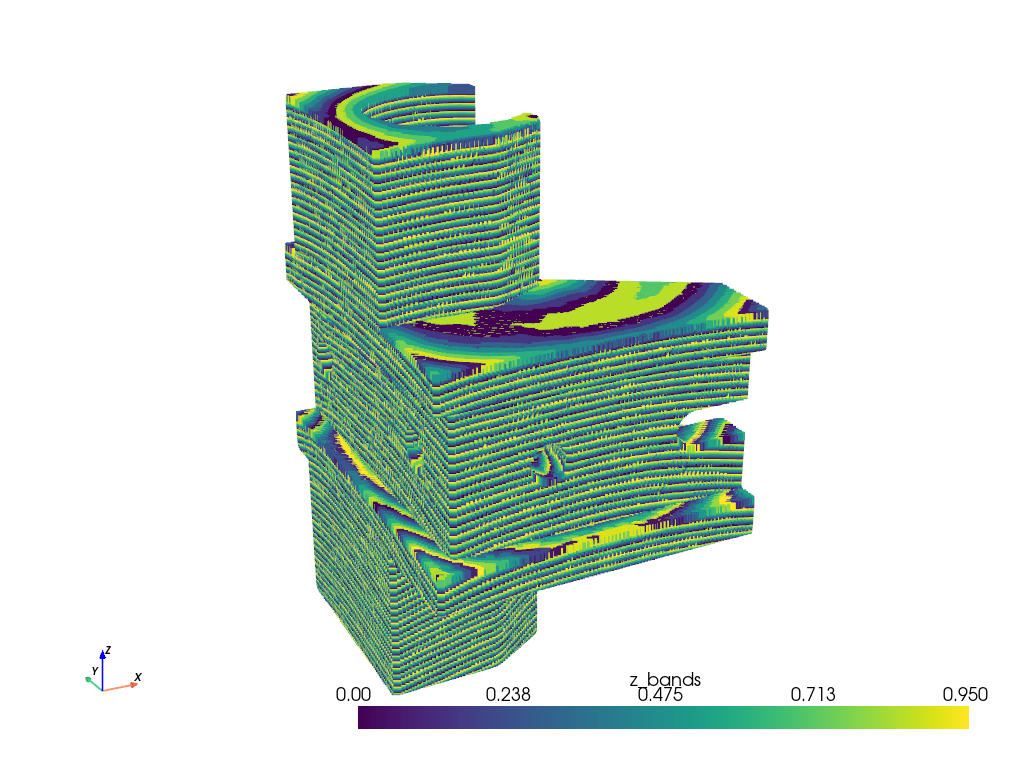

In [28]:
# Plot new_gcode_points using PyVista (Cartesian Prusa MK3S version)
import numpy as np
import pyvista as pv

# Extract XYZ coordinates
temp = np.array([point["position"] for point in new_gcode_points])
poly = pv.PolyData(temp)

# Add useful scalar data for plotting
poly.point_data["command"] = np.array([point["command"] for point in new_gcode_points])
poly.point_data["feed"] = np.array([
    point["feed"] if point["feed"] is not None else np.nan
    for point in new_gcode_points
])
poly.point_data["extrusion"] = np.array([
    point["extrusion"] if point["extrusion"] is not None else np.nan
    for point in new_gcode_points
])
poly.point_data["original_z"] = np.array([point["original_position"][2] for point in new_gcode_points])
poly.point_data["travelling"] = np.array([point["travelling"] for point in new_gcode_points])

# Optional: color by Z-bands to see layers
poly.point_data["z_bands"] = poly.point_data["original_z"] % 1

# Plot only extrusion moves (G1)
mask = np.array([point["command"] == "G1" for point in new_gcode_points])
poly.extract_points(mask).plot(
    scalars="z_bands",
    cpos=[-0.5, -1, 0.5],
    point_size=8
)


In [31]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the gcode
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# cmap = plt.get_cmap('viridis')
# rotation_normalized = temp.cell_data["rotation"] / np.max(np.abs(temp.cell_data["rotation"]),axis=0)
# colors = cmap(rotation_normalized)
# # for i in np.arange(len(temp.points)-1):
# #     ax.plot(
# #         [temp.points[i,0],temp.points[i+1,0]],
# #         [temp.points[i,1],temp.points[i+1,1]],
# #         [temp.points[i,2],temp.points[i+1,2]],
# #         c=colors[i],
# #         markersize=0.8, linewidth=0.9, marker='.', alpha=0.5)
# # plot G00 moves in different color
# g00_indices = np.where(temp.cell_data["command"] == "G00")[0]
# g01_indices = np.where(temp.cell_data["command"] == "G01")[0]
# ax.plot(temp.points[g00_indices,0], temp.points[g00_indices,1], temp.points[g00_indices,2], markersize=0.4, linewidth=0.3, marker=".", alpha=0.5, color="red")
# ax.plot(temp.points[g01_indices,0], temp.points[g01_indices,1], temp.points[g01_indices,2], markersize=0.4, linewidth=0.3, marker=".", alpha=0.5, color="blue")
# ax.set_box_aspect((np.ptp(temp.points[:,0]), np.ptp(temp.points[:,1]), np.ptp(temp.points[:,2])))
# plt.show()

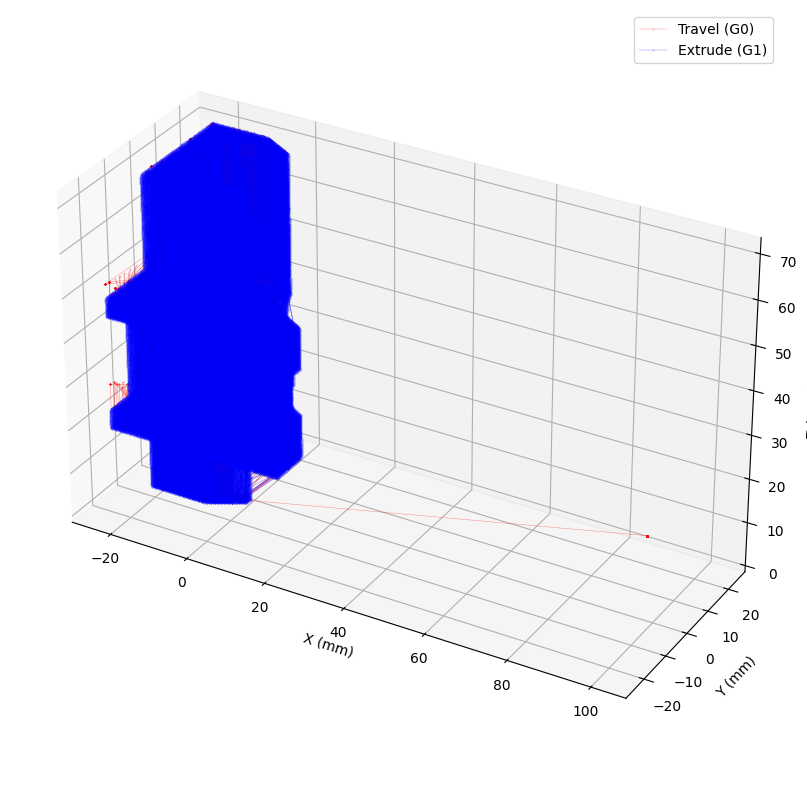

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
import numpy as np

# %matplotlib inline   # <- only if you're in Jupyter

# Extract XYZ positions and commands
points = np.array([point["position"] for point in new_gcode_points])
commands = np.array([point["command"] for point in new_gcode_points])

# Plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Travel moves (G0)
g00_indices = np.where(commands == "G0")[0]
ax.plot(points[g00_indices, 0],
        points[g00_indices, 1],
        points[g00_indices, 2],
        marker=".", linewidth=0.3, markersize=0.4,
        alpha=0.5, color="red", label="Travel (G0)")

# Extrusion moves (G1)
g01_indices = np.where(commands == "G1")[0]
ax.plot(points[g01_indices, 0],
        points[g01_indices, 1],
        points[g01_indices, 2],
        marker=".", linewidth=0.3, markersize=0.4,
        alpha=0.5, color="blue", label="Extrude (G1)")

# Aspect ratio = equal scaling for X, Y, Z
ax.set_box_aspect((np.ptp(points[:, 0]),
                   np.ptp(points[:, 1]),
                   np.ptp(points[:, 2])))

ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
ax.legend()
plt.show()


In [33]:
# ---------- G-code Shifter (Python version of The MATLAB script) ----------

# Configuration
x_shift = 100.0   # mm
y_shift = 90.0    # mm
z_shift = 0.0     # mm

in_filename = "output_gcode/Test_body_josh.gcode"
out_filename = in_filename.replace(".gcode", "_out.gcode")

shifted_lines = []

with open(in_filename, "r") as f_in:
    for line in f_in:
        stripped = line.strip()

        # Process only G0 / G1 movement lines
        if stripped.startswith("G0") or stripped.startswith("G1"):
            parts = stripped.split()
            new_parts = []

            for token in parts:
                if token.startswith("X"):
                    try:
                        val = float(token[1:]) + x_shift
                        new_parts.append(f"X{val:.4f}")
                    except:
                        new_parts.append(token)
                elif token.startswith("Y"):
                    try:
                        val = float(token[1:]) + y_shift
                        new_parts.append(f"Y{val:.4f}")
                    except:
                        new_parts.append(token)
                elif token.startswith("Z"):
                    try:
                        val = float(token[1:]) + z_shift
                        new_parts.append(f"Z{val:.4f}")
                    except:
                        new_parts.append(token)
                else:
                    # Preserve E, F, and other parameters unchanged
                    new_parts.append(token)

            shifted_lines.append(" ".join(new_parts) + "\n")
        else:
            # Copy other lines untouched (comments, M commands, etc.)
            shifted_lines.append(line)

# Write shifted G-code
with open(out_filename, "w") as f_out:
    f_out.writelines(shifted_lines)

print(f"Shifted G-code written to: {out_filename}")


Shifted G-code written to: output_gcode/Test_body_josh_out.gcode
